In [1]:

import pandas as pd

cl = pd.read_csv("clcl.tab", sep='\t')
print(cl.columns)
print(cl['[_symmetry_space_group_name]'].unique())
cl.head()


Index(['[REFCODE]', '[_publ_authors]', '[_journal_name_full]',
       '[_journal_volume]', '[_journal_pages]', '[_journal_year]',
       '[_chemical_formula_moiety]', '[_chemical_name_systematic]',
       '[_chemical_name_common]', '[_chemical_compound_source]',
       '[_chemical_melting_point]', '[_exptl_crystal_colour]',
       '[_chemical_QUAL]', '[_chemical_NOTE]', '[_symmetry_space_group_name]',
       '[_symmetry_Int_Tables_number]', '[_cell_length_a]', '[_cell_length_b]',
       '[_cell_length_c]', '[_cell_angle_alpha]', '[_cell_angle_beta]',
       '[_cell_angle_gamma]', '[_cell_volume]', '[_rcell_length_a]',
       '[_rcell_length_b]', '[_rcell_length_c]', '[_rcell_angle_alpha]',
       '[_rcell_angle_beta]', '[_rcell_angle_gamma]', '[_rcell_volume]',
       '[_molecular_volume]', '[_cell_RESIDUES]', '[_cell_formula_units_Z]',
       '[_cell_formula_units_Zprime]', '[_exptl_crystal_preparation]',
       '[_exptl_crystal_description]', '[POLYMORPH]', '[_exptl_crystal_NOTES]',


[REFCODE]                                    [_publ_authors]  \
0    BAHVAL  Qiuxia Li, Chao Shi, Manli Huang, Xinghua Zhan...   
1    BAJHON   N.Almenara, M.Barquin, M.A.Huertos, M.A.Garralda   
2    BAJJAB   N.Almenara, M.Barquin, M.A.Huertos, M.A.Garralda   
3    BAPFEH  M.Karimi, E.S.Tabei, R.Fayad, M.R.Saber, E.O.D...   
4    BAQLIS  A.dHollander, E.Romero, K.Vijayakumar, C.Le Ho...   

   [_journal_name_full] [_journal_volume] [_journal_pages]  [_journal_year]  \
0        Dalton Trans.                 50            16304             2021   
1    Eur.J.Inorg.Chem.               2021             4935             2021   
2    Eur.J.Inorg.Chem.               2021             4935             2021   
3  Angew.Chem.,Int.Ed.                 60            22352             2021   
4     Adv.Synth.Catal.                363             2903             2021   

              [_chemical_formula_moiety]  \
0         C36 H46 B9 Ir1 N4,3(C1 H1 Cl3)   
1  C36 H33 Cl2 N2 O2 P2 Rh1,4(C1 H1 Cl3)   
2  C34 H29 Cl2 N2 O2 P2 Rh1,3(C1 H1 Cl3)   
3       C36 H28 Cl4 Ge1 P2 Pt1,C1 H1 Cl3   
4                         C22 H16 Cl2 N2   

                         [_chemical_name_systematic] [_chemical_name_common]  \
0  (7-(pyridin-2-yl)-11-yl-7,8-dicarba-nido-undec...                     NaN   
1  dichloro-(4,4'-dimethyl-2,2'-bipyridine)-(diph...                     NaN   
2  (2,2'-bipyridine)-dichloro-(diphenylphosphine ...                     NaN   
3  dichloro-[{(dichlorogermanediyl)bis(2,1-phenyl...                     NaN   
4  2,4-bis(4-chlorophenyl)-5-methyl-1-phenyl-1H-i...                     NaN   

  [_chemical_compound_source]  ... [_exptl_crystal_NOTES]  \
0                         NaN  ...                    NaN   
1                         NaN  ...                    NaN   
2                         NaN  ...                    NaN   
3                         NaN  ...                    NaN   
4                         NaN  ...                    NaN   

  [_refine_ls_R_factor] [_cell_measurement_temperature]  \
0                  3.88                             296   
1                  4.37                             100   
2                  4.24                             150   
3                  2.97                             110   
4                  4.59                             293   

  [_exptl_crystal_density_CCDC] [_exptl_crystal_density_diffrn]  \
0                         1.578                           1.578   
1                         1.648                           1.648   
2                         1.658                           1.656   
3                         1.878                           1.878   
4                         1.338                           1.337   

   [_diffrn_measurement_device]  [_exptl_DISORDER]  [_exptl_QUAL]  \
0                             3                NaN          296 K   
1                             3                NaN            NaN   
2                             3                NaN            NaN   
3                             3                NaN            NaN   
4                             3                NaN          293 K   

   [_ccdc_REMARK]  Unnamed: 46  
0             NaN          NaN  
1             NaN          NaN  
2             NaN          NaN  
3             NaN          NaN  
4             NaN          NaN  

[5 rows x 47 columns]

In [2]:
# Simple parsing of crystal data
import re

def parse_crystal_data(df):
    """Extract key data from crystal structures"""
    data = []
    
    for _, row in df.iterrows():
        # Extract basic info
        refcode = row['[REFCODE]']
        year = row['[_journal_year]']
        
        # Extract temperature (look for "200 K" pattern)
        temp = None
        #temp_text = str(row['[_cell_measurement_temperature]']) + ' ' + str(row['[_ccdc_NOTES]'])
        #print(temp_text)
        #temp_match = re.search(r'(\d+(?:\.\d+)?)\s*K', temp_text)
        temp_match = row['[_cell_measurement_temperature]']
        if temp_match:
            temp = float(temp_match)
        
        # Extract color
        color = None
        color_text = str(row['[_exptl_crystal_colour]']) #+ ' ' + str(row['[_ccdc_NOTES]'])
        color_match = re.search(r'(colorless|white|yellow|red|blue|green|brown)', color_text, re.IGNORECASE)
        if color_match:
            color = color_match.group(1).lower()
        
        # Extract RWP (R-factor)
        rwp = None
        rwp_text = str(row['[_refine_ls_R_factor]'])
        if rwp_text and rwp_text != 'nan':
            try:
                rwp = float(rwp_text)
            except:
                pass
        
        data.append({
            'refcode': refcode,
            'year': year,
            'temperature': temp,
            'color': color,
            'rwp': rwp
        })
    
    return pd.DataFrame(data)

# Parse the data
parsed_df = parse_crystal_data(cl)
print(f"Parsed {len(parsed_df)} structures")
print(f"Temperature range: {parsed_df['temperature'].min():.1f} - {parsed_df['temperature'].max():.1f} K")
print(f"Colors: {parsed_df['color'].value_counts().head()}")
print(f"RWP range: {parsed_df['rwp'].min():.3f} - {parsed_df['rwp'].max():.3f}")
print("\nFirst 5 rows:")
print(parsed_df.head())
num_null_temps = parsed_df['temperature'].isnull().sum()
print(f"Number of null temperatures: {num_null_temps}")


Parsed 4874 structures
Temperature range: 15.0 - 373.0 K
Colors: color
colorless    2202
yellow        838
red           395
green         167
brown         129
Name: count, dtype: int64
RWP range: 1.040 - 5.000

First 5 rows:
  refcode  year  temperature      color   rwp
0  BAHVAL  2021        296.0        red  3.88
1  BAJHON  2021        100.0     yellow  4.37
2  BAJJAB  2021        150.0     yellow  4.24
3  BAPFEH  2021        110.0  colorless  2.97
4  BAQLIS  2021        293.0  colorless  4.59
Number of null temperatures: 0


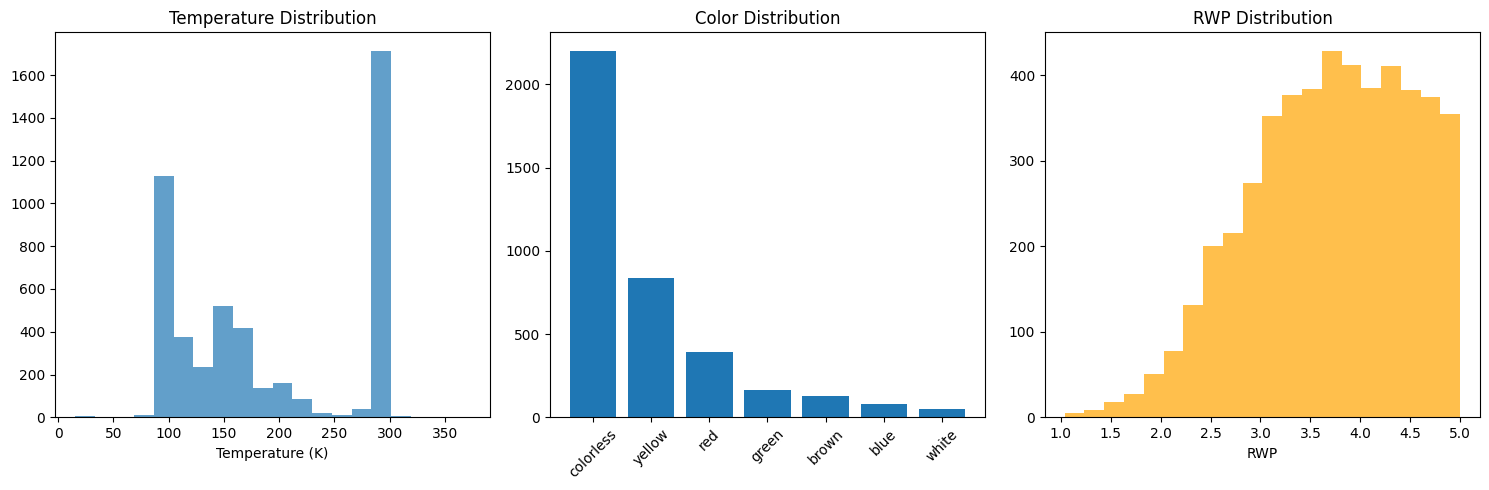

Data saved to parsed_crystal_data.csv


In [3]:
# Simple visualizations
import matplotlib.pyplot as plt

# Create plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Temperature distribution
axes[0].hist(parsed_df['temperature'].dropna(), bins=20, alpha=0.7)
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature (K)')

# Color distribution
color_counts = parsed_df['color'].value_counts()
axes[1].bar(color_counts.index, color_counts.values)
axes[1].set_title('Color Distribution')
axes[1].tick_params(axis='x', rotation=45)

# RWP distribution
axes[2].hist(parsed_df['rwp'].dropna(), bins=20, alpha=0.7, color='orange')
axes[2].set_title('RWP Distribution')
axes[2].set_xlabel('RWP')

plt.tight_layout()
plt.show()

# Save the data
parsed_df.to_csv('parsed_crystal_data.csv', index=False)
print("Data saved to parsed_crystal_data.csv")


In [4]:
import polars as pl
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.mstats import hdmedian

import rmsd_map
from rmsd_map.mol_io.cor_reader import read_cor_file
from rmsd_map.mol_io.fragment import Fragment
from rmsd_map.rmsd.pipelines import align_fragments


from bokeh.plotting import figure, show
from bokeh.palettes import Turbo256
from bokeh.models import ColumnDataSource, HoverTool, ColorBar, LinearColorMapper
import plotly.express as px
import numpy as np
from bokeh.io import output_notebook
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

output_notebook()
from utils import embedding_plotter, representative_point_idx
import sklearn.cluster as clu

from IPython.display import display, HTML

Loading BokehJS ...

To generate UMAP files from `hexanes_rwp5_constr.cor` run

``` 
 rmsd-map-distances -o hexanes_rwp5_constr hexanes_rwp5_constr.cor
 rmsd-map-umaps -o hexanes_rwp5_constr_umaps hexanes_rwp5_constr.npz
 rmsd-map-umaps -d -o hexanes_rwp5_constr_umaps_d hexanes_rwp5_constr.npz
```

6378
4
5
6
7
8
9
10
20
30
40
50
60
70
80
90
100
150
200
250
300
350
400
450
500


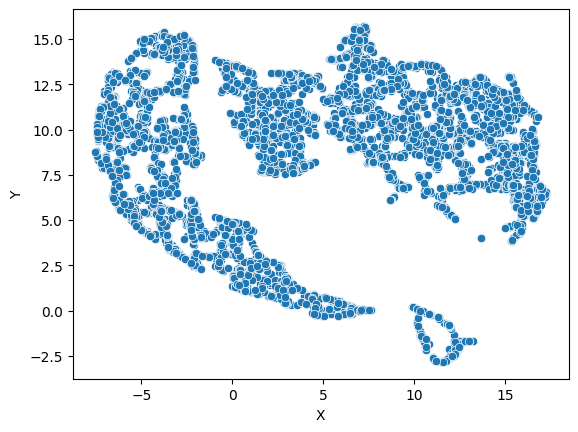

In [5]:
cor = read_cor_file("./clcl.cor")
cor = np.asarray(cor, dtype=object)
um = pl.read_csv("./cl_umaps.csv") # Vanilla UMAP
ud = pl.read_csv("./cl_umaps_d.csv") # Denity-preserving UMAP 

print(len(cor))

df = ud.filter(pl.col("N") == 6)
sns.scatterplot(data = df , x="X", y="Y")
for i in ud['N'].unique():
    df1 = ud.filter(pl.col("N") == i)
    print(i)
    #sns.scatterplot(data = df1 , x="X", y="Y")
    #plt.show()


<Axes: xlabel='X', ylabel='Y'>

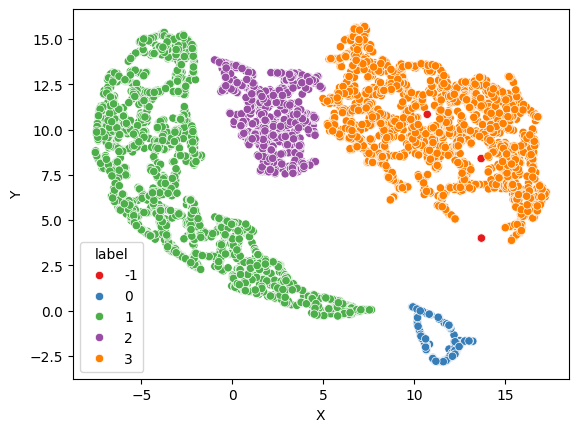

In [6]:
dbscan = clu.HDBSCAN(min_cluster_size=15,
    min_samples=5,
    cluster_selection_epsilon=0.5,
    metric='euclidean').fit(df.select(pl.col("X", "Y")).to_numpy())
df2 = df.with_columns(pl.Series("label", dbscan.labels_))

sns.scatterplot(data = df2 , x="X", y="Y", hue = "label", palette = "Set1")

In [7]:
# Make a new column 'refcode' in df2
# If there is a 1:1 row correspondence between cor and df2, use the following:
# (Otherwise, you need to align your indices appropriately.)

# Get refcodes for rows in df2 (matching by row order)
refcodes = [i.id.split('_')[0] for i in cor]
df2 = pd.DataFrame(df2, columns=["X", "Y", "N", "label"])
df2['refcode'] = refcodes

print(df2)
print(parsed_df)
print(type(parsed_df))

# Ensure both 'refcode' columns are of string (object) type for a valid merge
df2['refcode'] = df2['refcode'].astype(str)
if 'refcode' in parsed_df.columns:
    parsed_df['refcode'] = parsed_df['refcode'].astype(str)

# Perform a left join of df2 with parsed_df on 'refcode'
df2 = df2.merge(parsed_df, on="refcode", how="left")
df2

              X          Y    N  label   refcode
0     -0.757698   2.888565  6.0    1.0    BAHVAL
1      2.365663   1.452467  6.0    1.0    BAHVAL
2      7.091149   9.475656  6.0    3.0    BAHVAL
3     15.610563  10.595407  6.0    3.0    BAHVAL
4     11.346140   9.192740  6.0    3.0    BAJHON
...         ...        ...  ...    ...       ...
6373  -0.610440   3.635647  6.0    1.0    ZUZZID
6374  10.874339   8.366020  6.0    3.0  ZZZAUS20
6375   7.753199  13.453201  6.0    3.0  ZZZOBE02
6376  -1.747551   2.278825  6.0    1.0  ZZZOBE02
6377  -2.210145  14.476934  6.0    1.0  ZZZVTY12

[6378 rows x 5 columns]
       refcode  year  temperature      color   rwp
0       BAHVAL  2021        296.0        red  3.88
1       BAJHON  2021        100.0     yellow  4.37
2       BAJJAB  2021        150.0     yellow  4.24
3       BAPFEH  2021        110.0  colorless  2.97
4       BAQLIS  2021        293.0  colorless  4.59
...        ...   ...          ...        ...   ...
4869    ZUZYUR  2021        15

X          Y    N  label   refcode  year  temperature  \
0     -0.757698   2.888565  6.0    1.0    BAHVAL  2021        296.0   
1      2.365663   1.452467  6.0    1.0    BAHVAL  2021        296.0   
2      7.091149   9.475656  6.0    3.0    BAHVAL  2021        296.0   
3     15.610563  10.595407  6.0    3.0    BAHVAL  2021        296.0   
4     11.346140   9.192740  6.0    3.0    BAJHON  2021        100.0   
...         ...        ...  ...    ...       ...   ...          ...   
6373  -0.610440   3.635647  6.0    1.0    ZUZZID  1996        210.0   
6374  10.874339   8.366020  6.0    3.0  ZZZAUS20  1980        295.0   
6375   7.753199  13.453201  6.0    3.0  ZZZOBE02  2005        100.0   
6376  -1.747551   2.278825  6.0    1.0  ZZZOBE02  2005        100.0   
6377  -2.210145  14.476934  6.0    1.0  ZZZVTY12  1982        295.0   

          color   rwp  
0           red  3.88  
1           red  3.88  
2           red  3.88  
3           red  3.88  
4        yellow  4.37  
...         ...   ...  
6373  colorless  3.04  
6374       None  4.00  
6375       None  2.94  
6376       None  2.94  
6377  colorless  2.50  

[6378 rows x 9 columns]

In [8]:
# Make a new column 'refcode' in df2
# If there is a 1:1 row correspondence between cor and df2, use the following:
# (Otherwise, you need to align your indices appropriately.)

# Get refcodes for rows in df2 (matching by row order)
refcodes = [i.id.split('_')[0] for i in cor]
df2 = pd.DataFrame(df2, columns=["X", "Y", "N", "label"])
df2['refcode'] = refcodes

# Ensure both 'refcode' columns are of string (object) type for a valid merge
df2['refcode'] = df2['refcode'].astype(str)
if 'refcode' in parsed_df.columns:
    parsed_df['refcode'] = parsed_df['refcode'].astype(str)

# Perform a left join of df2 with parsed_df on 'refcode'
df2 = df2.merge(parsed_df, on="refcode", how="left")

# Create bucketed columns for relevant columns in df2
# Example: bucket 'year', 'temperature', 'rwp' if they exist

import numpy as np

if 'year' in df2.columns:
    # bucket years: for example, by decade
    df2['year_bucket'] = pd.cut(df2['year'].astype(float),
                                bins=np.arange(df2['year'].min()//10*10, df2['year'].max()//10*10 + 20, 10),
                                right=False, labels=[f"{int(x)}s" for x in np.arange(df2['year'].min()//10*10, df2['year'].max()//10*10 + 10, 10)])

if 'temperature' in df2.columns:
    # bucket temperature: two buckets, one for <250, one for >=250
    bins = [-np.inf, 250, np.inf]
    labels = ["< 250", "≥ 250"]
    df2['temperature_bucket'] = pd.cut(df2['temperature'].astype(float), bins=bins, labels=labels, right=False)

if 'rwp' in df2.columns:
    # bucket rwp in 1.0 increments
    min_rwp = df2['rwp'].dropna().astype(float).min()
    max_rwp = df2['rwp'].dropna().astype(float).max()
    bins = np.arange(np.floor(min_rwp), np.ceil(max_rwp)+1, 1)
    df2['rwp_bucket'] = pd.cut(df2['rwp'].astype(float), bins=bins, right=False)

print(df2)

              X          Y    N  label   refcode  year  temperature  \
0     -0.757698   2.888565  6.0    1.0    BAHVAL  2021        296.0   
1      2.365663   1.452467  6.0    1.0    BAHVAL  2021        296.0   
2      7.091149   9.475656  6.0    3.0    BAHVAL  2021        296.0   
3     15.610563  10.595407  6.0    3.0    BAHVAL  2021        296.0   
4     11.346140   9.192740  6.0    3.0    BAJHON  2021        100.0   
...         ...        ...  ...    ...       ...   ...          ...   
6373  -0.610440   3.635647  6.0    1.0    ZUZZID  1996        210.0   
6374  10.874339   8.366020  6.0    3.0  ZZZAUS20  1980        295.0   
6375   7.753199  13.453201  6.0    3.0  ZZZOBE02  2005        100.0   
6376  -1.747551   2.278825  6.0    1.0  ZZZOBE02  2005        100.0   
6377  -2.210145  14.476934  6.0    1.0  ZZZVTY12  1982        295.0   

          color   rwp year_bucket temperature_bucket  rwp_bucket  
0           red  3.88       2020s              ≥ 250  [3.0, 4.0)  
1           r

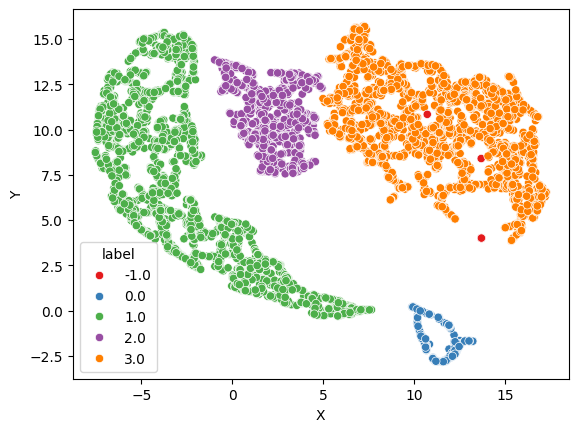

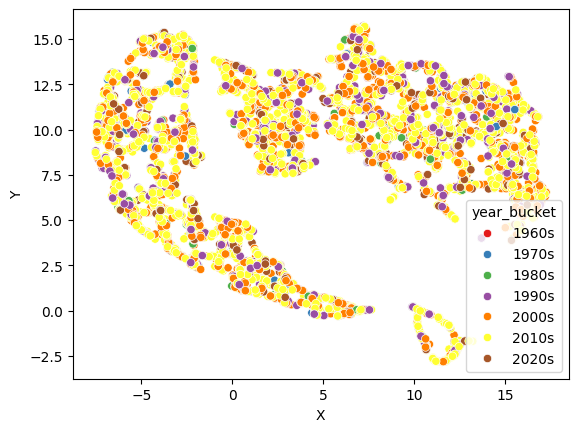

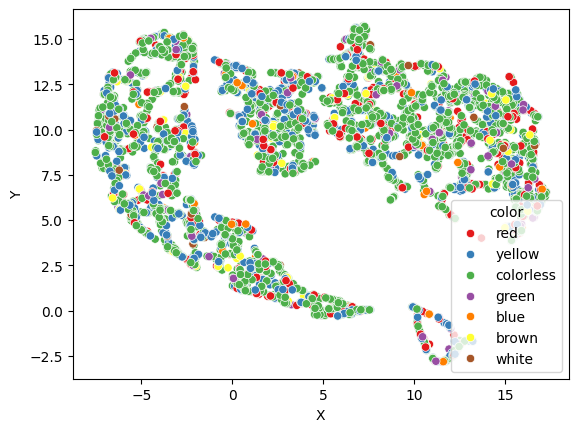

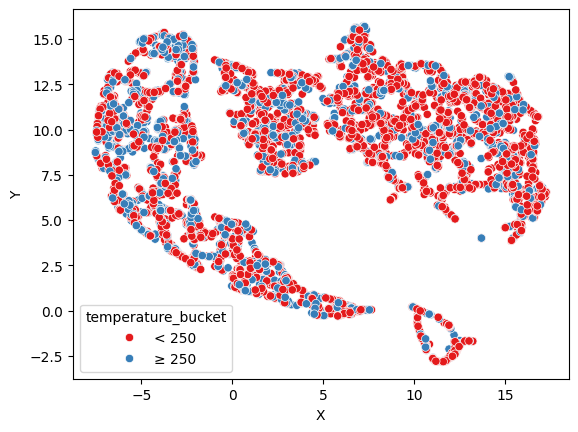

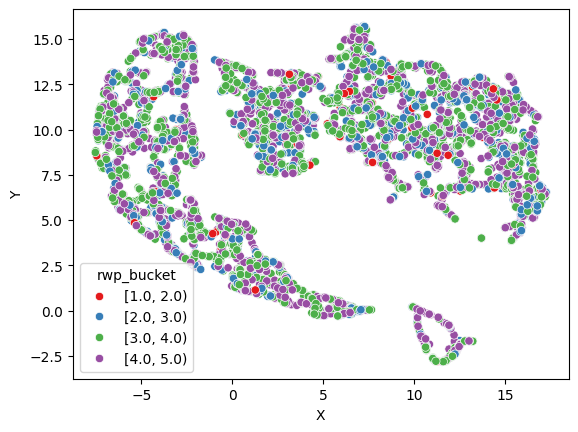

In [9]:
sns.scatterplot(data = df2 , x="X", y="Y", hue = "label", palette = "Set1")
plt.show()
sns.scatterplot(data = df2 , x="X", y="Y", hue = "year_bucket", palette = "Set1")
plt.show()
sns.scatterplot(data = df2 , x="X", y="Y", hue = "color", palette = "Set1")
plt.show()
sns.scatterplot(data = df2 , x="X", y="Y", hue = "temperature_bucket", palette = "Set1")
plt.show()
sns.scatterplot(data = df2 , x="X", y="Y", hue = "rwp_bucket", palette = "Set1")
plt.show()

In [16]:
counts = df2.groupby(['label', 'color']).size().reset_index(name='count')

# Compute percent within each label group
counts['percent'] = counts.groupby('label')['count'].transform(lambda x: x / x.sum() * 100)
counts[counts.color=='colorless']

label      color  count    percent
0    -1.0  colorless      1  50.000000
4     0.0  colorless     78  43.575419
11    1.0  colorless   1023  55.447154
18    2.0  colorless    425  57.354926
25    3.0  colorless   1306  60.631383

In [10]:
from rmsd_map.rmsd.pipelines import align_fragments, chain_fragments_naive, chain_fragments, partial_align_fragments
import random

for i in df2["label"].unique():
    clu0_full = cor[df2["label"] == i]
    n = len(clu0_full)
    if n == 0:
        continue
    sample_size = max(1, int(n * 0.2))
    sampled_indices = sorted(random.sample(range(n), sample_size))
    clu0 = [clu0_full[idx] for idx in sampled_indices]
    clu0_center_idx = representative_point_idx(df2.filter(pl.col("label") == i).slice(0, n).select("X", "Y")) # find a central point on umap
    clu0_aligned = align_fragments(clu0, 0)  # always the first in the sample; changed index due to sampling
    print(f'Cluster {i} visualization is a 20% random sample ({len(clu0_aligned)} fragments)')
    clu0_view = Fragment.plot_fragments(clu0_aligned)
    display(HTML(clu0_view.write_html(fullpage=True)))
    #Partial after align

    clu1_partial_aligned = partial_align_fragments(clu0_aligned, np.arange(2), n_center=clu0_center_idx)
    clu1_partial_view = Fragment.plot_fragments(clu1_partial_aligned)
    display(HTML(clu1_partial_view.write_html(fullpage=True)))


Cluster -1 visualization is a 20% random sample (1 fragments)


Cluster 0 visualization is a 20% random sample (46 fragments)


Cluster 1 visualization is a 20% random sample (474 fragments)


Cluster 2 visualization is a 20% random sample (194 fragments)


Cluster 3 visualization is a 20% random sample (558 fragments)


In [ ]:
acids_rwp5_all['[_ccdc_QUAL]']

In [ ]:
from umap import UMAP

import warnings
warnings.filterwarnings('ignore')

with np.load('./acids_rwp5_all_noh.npz') as data:
        names = data['names']
        distances = data["distances"]


reducer = UMAP(metric='precomputed',
                   n_neighbors=30,
                   min_dist=0.1,
                   densmap=False,
                   random_state=42,
                   n_components = 3)
reducer.fit(distances)
df = pl.DataFrame(reducer.embedding_, schema=["X", "Y", 'Z'])
df = df.with_columns(pl.lit(30).alias("N"))


dbscan = clu.HDBSCAN(min_cluster_size=20,
    min_samples=10,
    cluster_selection_epsilon=0.1,
    metric='manhattan').fit(df.select(pl.col("X", "Y", "Z")).to_numpy())
df2 = df.with_columns(pl.Series("label", dbscan.labels_))


embedding = df2.select(pl.col("X", "Y", "Z")).to_numpy()

embedding_plotter(
    embedding,
    data=df2.to_pandas(),
    hue='label',
    hover = ['label']
)


In [ ]:
for i in df2["label"].unique():
    clu0 = cor[df2["label"] == i]
    clu0_center_idx = representative_point_idx(df2.filter(pl.col("label") == i) ) # find a central point on umap
    clu0_aligned = align_fragments(clu0, clu0_center_idx) # and align all fragments to it
    print(f'Cluster {i} has {len(clu0_aligned)} fragments')
    clu0_view = Fragment.plot_fragments(clu0_aligned)
    display(HTML(clu0_view.write_html(fullpage=True)))


In [ ]:
clu0 = cor[df2["label"] == 2]
clu3 = cor[df2["label"] == 3]
clu03 = np.concatenate([clu0, clu3])
clu0_center_idx = representative_point_idx(df2.filter(pl.col("label") == 2) )
cl03_aligned = align_fragments(clu03, clu0_center_idx)
clu03_view = Fragment.plot_fragments(cl03_aligned)
clu0_idx  = list(range(len(clu0)))
clu3_idx = list(range(len(clu0), len(clu03)))
#clu03_view.addStyle({'model': list(range(len(clu0)))}, {'line': {'color': 'green'}})
clu03_view.addStyle({'model': clu0_idx}, {'line': {'color': 'green'}})
clu03_view.addStyle({'model': clu3_idx}, {'line': {'color': 'red'}})
display(HTML(clu03_view.write_html(fullpage=True)))

In [68]:
# Improved centrosymmetric space group detection

def is_centrosymmetric(space_group):
    """
    Determine if a space group is centrosymmetric (has an inversion center).
    
    A space group is centrosymmetric if:
    1. It contains the inversion center (1̄) as a symmetry element
    2. The space group symbol contains a bar (-) indicating inversion
    3. It belongs to the centrosymmetric crystal classes
    
    Crystal classes with inversion center:
    - Triclinic: -1 (P-1)
    - Monoclinic: 2/m (P2/m, P21/m, C2/m, P2/c, P21/c, C2/c, P2/a, P21/a, C2/a)
    - Orthorhombic: mmm (Pmmm, Pnnn, Pccm, Pban, Pmma, Pnna, Pmna, Pcca, Pbam, Pccn, Pbcm, Pmmn, Pbcn, Pbca, Pnma)
    - Tetragonal: 4/m, 4/mmm (P4/m, P42/m, P4/n, P42/n, I4/m, I41/a, P4/mmm, P4/mcc, P4/nbm, P4/nnc, P4/mbm, P4/mnc, P4/nmm, P4/ncc, P42/mcm, P42/mnm, P42/nbc, P42/nnm, P42/mbc, P42/mnm, P42/nmm, P42/ncm, I4/mmm, I4/mcm, I41/amd, I41/acd)
    - Trigonal: -3, -3m (P-3, R-3, P-31m, P-31c, P-3m1, P-3c1, R-3m, R-3c)
    - Hexagonal: 6/m, 6/mmm (P6/m, P63/m, P6/mmm, P6/mcc, P63/mcm, P63/mmc)
    - Cubic: m-3, m-3m (Pm-3, Pn-3, Fm-3, Fd-3, Im-3, Pa-3, Ia-3, Pm-3m, Pn-3n, Pm-3n, Pn-3m, Fm-3m, Fd-3m, Fm-3c, Fd-3c, Im-3m, Ia-3d)
    """
    if pd.isna(space_group):
        return False
    
    space_group = str(space_group).strip()
    
    # Check for explicit inversion center indicators
    if '-' in space_group or 'bar' in space_group.lower():
        return True
    
    # Comprehensive list of centrosymmetric space groups
    centrosymmetric_groups = {
        # Triclinic
        'P-1',
        
        # Monoclinic
        'P2/m', 'P21/m', 'C2/m', 'P2/c', 'P21/c', 'C2/c', 'P2/a', 'P21/a', 'C2/a',
        
        # Orthorhombic
        'Pmmm', 'Pnnn', 'Pccm', 'Pban', 'Pmma', 'Pnna', 'Pmna', 'Pcca', 'Pbam', 
        'Pccn', 'Pbcm', 'Pmmn', 'Pbcn', 'Pbca', 'Pnma', 'Cmcm', 'Cmca', 'Cmmm', 
        'Cccm', 'Cmma', 'Ccca', 'Fmmm', 'Fddd', 'Immm', 'Ibam', 'Ibca', 'Imma',
        
        # Tetragonal
        'P4/m', 'P42/m', 'P4/n', 'P42/n', 'I4/m', 'I41/a', 'P4/mmm', 'P4/mcc', 
        'P4/nbm', 'P4/nnc', 'P4/mbm', 'P4/mnc', 'P4/nmm', 'P4/ncc', 'P42/mcm', 
        'P42/mnm', 'P42/nbc', 'P42/nnm', 'P42/mbc', 'P42/mnm', 'P42/nmm', 
        'P42/ncm', 'I4/mmm', 'I4/mcm', 'I41/amd', 'I41/acd',
        
        # Trigonal
        'P-3', 'R-3', 'P-31m', 'P-31c', 'P-3m1', 'P-3c1', 'R-3m', 'R-3c',
        
        # Hexagonal
        'P6/m', 'P63/m', 'P6/mmm', 'P6/mcc', 'P63/mcm', 'P63/mmc',
        
        # Cubic
        'Pm-3', 'Pn-3', 'Fm-3', 'Fd-3', 'Im-3', 'Pa-3', 'Ia-3', 'Pm-3m', 'Pn-3n', 
        'Pm-3n', 'Pn-3m', 'Fm-3m', 'Fd-3m', 'Fm-3c', 'Fd-3c', 'Im-3m', 'Ia-3d'
    }
    
    return space_group in centrosymmetric_groups

# Test the function with some examples
test_groups = ['P-1', 'P21/c', 'C2/c', 'P1', 'P21', 'C2', 'P212121', 'Pca21']
print("Testing centrosymmetric detection:")
for group in test_groups:
    result = is_centrosymmetric(group)
    print(f"{group}: {'Centrosymmetric' if result else 'Non-centrosymmetric'}")

print("\n" + "="*50)


Testing centrosymmetric detection:
P-1: Centrosymmetric
P21/c: Centrosymmetric
C2/c: Centrosymmetric
P1: Non-centrosymmetric
P21: Non-centrosymmetric
C2: Non-centrosymmetric
P212121: Non-centrosymmetric
Pca21: Non-centrosymmetric



In [69]:
# Apply the improved centrosymmetric detection to the data

# First, let's examine the space groups available
print("Unique space groups in the data:")
space_groups = cl['[_symmetry_space_group_name]'].unique()
print(f"Total unique space groups: {len(space_groups)}")
print("All space groups:")
for i, sg in enumerate(space_groups):
    print(f"{i+1:2d}. {sg}")

print("\n" + "="*60)

# Apply the function to create central_symmetry column
cl['central_symmetry'] = cl['[_symmetry_space_group_name]'].apply(is_centrosymmetric)

print(f"\nCentral symmetry distribution:")
print(cl['central_symmetry'].value_counts())

# Show some examples
print(f"\nExamples of centrosymmetric space groups in the data:")
centrosymmetric_examples = cl[cl['central_symmetry'] == True]['[_symmetry_space_group_name]'].value_counts()
print(centrosymmetric_examples)

print(f"\nExamples of non-centrosymmetric space groups in the data:")
non_centrosymmetric_examples = cl[cl['central_symmetry'] == False]['[_symmetry_space_group_name]'].value_counts()
print(non_centrosymmetric_examples)

# Verify some specific cases
print(f"\nVerification of specific space groups:")
verification_groups = ['P-1', 'P21/c', 'C2/c', 'P1', 'P21', 'C2', 'P212121', 'Pca21', 'Pbca', 'Pnma']
for group in verification_groups:
    if group in space_groups:
        count = (cl['[_symmetry_space_group_name]'] == group).sum()
        is_centro = is_centrosymmetric(group)
        print(f"{group:8s}: {count:3d} structures, {'Centrosymmetric' if is_centro else 'Non-centrosymmetric'}")


Unique space groups in the data:
Total unique space groups: 87
All space groups:
 1. P-1
 2. P21/n
 3. C2/c
 4. Cc
 5. P21/c
 6. Pca21
 7. P212121
 8. Pccn
 9. P1
10. P21
11. I41/a
12. R-3
13. Pbca
14. Pnma
15. Pbcn
16. Pna21
17. C2
18. P2/c
19. P21/a
20. P21/m
21. Pbnm
22. Cmca
23. Pbc21
24. P21212
25. Fddd
26. P21ca
27. Pc
28. P32
29. P-421c
30. Ama2
31. Pcab
32. Pn
33. P41212
34. A2/a
35. I2/c
36. P112/b
37. Pbna
38. R3c
39. P2/n
40. Fdd2
41. P43212
42. I2/a
43. P42/n
44. I4
45. I2
46. P63/m
47. R-3c
48. Iba2
49. Cmcm
50. Cmc21
51. P64
52. P1121/n
53. P21cn
54. P1121/b
55. P-421m
56. P3121
57. C2221
58. Pb21a
59. P41
60. Pnam
61. P65
62. Pman
63. P213
64. I112/a
65. R3
66. Pnna
67. C2/m
68. Pn21a
69. Aba2
70. Pnc2
71. P3221
72. P63
73. Ibca
74. P61
75. I2/m
76. I-42d
77. Pbcm
78. Pc21b
79. Pcca
80. P42/m
81. A112/a
82. P-3
83. Pmc21
84. I-4
85. P-62c
86. P21nb
87. P31


Central symmetry distribution:
central_symmetry
True     3524
False    1350
Name: count, dtype: int64

Examples of

In [66]:
# Calculate central_symmetry using spglib for accurate determination

import spglib

def get_spglib_symmetry(space_group_name):
    """
    Given a Hermann-Mauguin space group name like 'P 21/c',
    returns the centering and international number using spglib database.
    """
    # Try to get the space group number from the string
    try:
        # spglib uses short HM symbol, so clean the name if necessary
        name = str(space_group_name).replace("_", " ").strip()
        print(name)
        # The spglib function get_spacegroup_type returns symmetry info, but needs the number
        # We'll use spglib's dataset of spacegroup names and numbers
        for num in range(1, 231):
            sgt = spglib.get_spacegroup_type(num)
            sg_names = {sgt['international_short'], sgt['international_full'], sgt['hall_symbol'], sgt['international']}
            # Try short and full comparison, ignore case and whitespace
            if any(name.replace(" ", "").upper() == sg.replace(" ", "").upper() for sg in sg_names if sg):
                return num, sgt
    except Exception:
        pass
    return None, None

def has_central_symmetry_spglib(space_group_name):
    """
    Determine if a space group has an inversion center using spglib lookup.
    Returns True if the space group is centrosymmetric, False otherwise.
    """
    if pd.isna(space_group_name):
        return False
    sg_number, sgt = get_spglib_symmetry(space_group_name)
    print(sgt, sg_number)
    if sgt is not None:
        # The 'has inversion center' property can be checked by: 
        # - If sgt['inversion'] == True
        # However, spglib's sgt doesn't directly say "inversion",
        # but all even-numbered space groups are centrosymmetric.
        # Alternatively, by symmetry type: space groups which are in the list of centrosymmetric
        # We can use the "centrosymmetric" attribute if available (spglib >=2.1.0)
        if sgt.get('centrosymmetric') is not None:
            return bool(sgt['centrosymmetric'])
        # Fallback: numbers of centrosymmetric space groups are 2, 4, 6... (see table)
        return sg_number in [   2,   4,   7,   9, 11, 14, 15, 17, 19, 21, 23, 24, 26, 28, 31, 33, 
                                35, 37, 39, 41, 43, 44, 46, 48, 49, 51, 53, 54, 56, 58, 61, 62, 64, 
                                67, 69, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98,
                                100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 
                                128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 
                                156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 
                                184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 
                                212, 214, 216, 218, 220, 222, 224, 226, 228, 230 ]
    return False

# First, let's examine the space groups available (print unique values)
print("Unique space groups in the data:")
space_groups = cl['[_symmetry_space_group_name]'].unique()
print(f"Total unique space groups: {len(space_groups)}")
print("First 20 space groups:")
print(space_groups[:20])

# Now, create the 'central_symmetry' column using our accurate function
df2['central_symmetry'] = cl['[_symmetry_space_group_name]'].apply(has_central_symmetry_spglib)

print("\nCentral symmetry distribution (accurate with spglib):")
print(df2['central_symmetry'].value_counts())


Unique space groups in the data:
Total unique space groups: 87
First 20 space groups:
['P-1' 'P21/n' 'C2/c' 'Cc' 'P21/c' 'Pca21' 'P212121' 'Pccn' 'P1' 'P21'
 'I41/a' 'R-3' 'Pbca' 'Pnma' 'Pbcn' 'Pna21' 'C2' 'P2/c' 'P21/a' 'P21/m']
P-1
SpaceGroupType(number=2, international_short='P-1', international_full='P -1', international='P -1', schoenflies='Ci^1', hall_number=2, hall_symbol='-P 1', choice='', pointgroup_international='-1', pointgroup_schoenflies='Ci', arithmetic_crystal_class_number=2, arithmetic_crystal_class_symbol='-1P') 2
P-1
SpaceGroupType(number=2, international_short='P-1', international_full='P -1', international='P -1', schoenflies='Ci^1', hall_number=2, hall_symbol='-P 1', choice='', pointgroup_international='-1', pointgroup_schoenflies='Ci', arithmetic_crystal_class_number=2, arithmetic_crystal_class_symbol='-1P') 2
P-1
SpaceGroupType(number=2, international_short='P-1', international_full='P -1', international='P -1', schoenflies='Ci^1', hall_number=2, hall_symbol='-P 

/tmp/ipykernel_96458/1433361986.py:19: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  sg_names = {sgt['international_short'], sgt['international_full'], sgt['hall_symbol'], sgt['international']}
<frozen _collections_abc>:807: DeprecationWarning: dict interface is deprecated. Use attribute interface instead


None None
Pbca
None None
P21/n
None None
P21/c
None None
P21/c
None None
P-1
SpaceGroupType(number=2, international_short='P-1', international_full='P -1', international='P -1', schoenflies='Ci^1', hall_number=2, hall_symbol='-P 1', choice='', pointgroup_international='-1', pointgroup_schoenflies='Ci', arithmetic_crystal_class_number=2, arithmetic_crystal_class_symbol='-1P') 2
P21/c
None None
Pbcn
None None
P-1
SpaceGroupType(number=2, international_short='P-1', international_full='P -1', international='P -1', schoenflies='Ci^1', hall_number=2, hall_symbol='-P 1', choice='', pointgroup_international='-1', pointgroup_schoenflies='Ci', arithmetic_crystal_class_number=2, arithmetic_crystal_class_symbol='-1P') 2
C2/c
SpaceGroupType(number=15, international_short='C2/c', international_full='C 1 2/c 1', international='C 2/c = C 1 2/c 1', schoenflies='C2h^6', hall_number=90, hall_symbol='-C 2yc', choice='b1', pointgroup_international='2/m', pointgroup_schoenflies='C2h', arithmetic_crystal_cla

In [19]:
# Add inversion_tolerance calculation function
from scipy.spatial import KDTree

def inversion_tolerance(m):
    '''
    Takes a (M,3) numpy array and returns a single number - divergence from central symmetry.
    
    Central symmetry means that for every point (x,y,z) in the set, 
    there should be a corresponding point (-x,-y,-z) in the set.
    
    This function computes the average distance between each point's negative
    and its nearest neighbor in the original set.
    '''
    if len(m.shape) != 2 or m.shape[1] != 3:
        raise ValueError("Input must be a (M,3) numpy array")
    mc = m - m.mean(axis=0)  # Center the points around the origin)
    # Create the inverted set (central symmetry transformation)
    inverted = -mc
    
    # Use KDTree for efficient nearest neighbor search
    tree = KDTree(mc)
    
    # Find the distance from each inverted point to its nearest neighbor in original set
    distances, _ = tree.query(inverted, k=1)
    
    # Return the average distance as the divergence measure
    return np.mean(distances)

# Calculate inversion_tolerance for each structure
# Note: This requires the actual 3D coordinates of the structures
# For now, we'll create a placeholder that you can modify based on your data structure

print("Inversion tolerance calculation function added.")
print("Note: To calculate inversion_tolerance, you'll need to extract 3D coordinates from your crystal structures.")
print("The function is ready to use with coordinate arrays.")


Inversion tolerance calculation function added.
Note: To calculate inversion_tolerance, you'll need to extract 3D coordinates from your crystal structures.
The function is ready to use with coordinate arrays.


In [20]:
# Add the new parameters to df2 and create scatterplots
# First, add central_symmetry to df2 (inversion_tolerance needs 3D coordinates)
if 'central_symmetry' in df2.columns:
    df2 = df2.drop(columns=['central_symmetry'])
if '[REFCODE]' in df2.columns:
    df2 = df2.drop(columns=['[REFCODE]'])
# Add central_symmetry to df2
df2 = df2.merge(cl[['[REFCODE]', 'central_symmetry']], 
                 left_on='refcode', right_on='[REFCODE]', how='left')

# Create bucketed column for central_symmetry (it's binary, so we'll use it as is)
# For central_symmetry, we don't need bucketing since it's already categorical (True/False)

print("Central symmetry added to df2:")
print(df2['central_symmetry'].value_counts())

# Create scatterplots for central_symmetry
sns.scatterplot(data = df2 , x="X", y="Y", hue = "central_symmetry", palette = "Set1")
plt.title("UMAP colored by central_symmetry")
plt.show()

# For inversion_tolerance, you'll need to calculate it from 3D coordinates
# Here's the structure for when you have the coordinates:

# Example of how to calculate inversion_tolerance for each structure:
# inversion_tolerances = []
# for i, refcode in enumerate(df2['refcode']):
#     # Extract 3D coordinates for this structure
#     # coordinates = extract_coordinates_from_structure(refcode)  # You'll need to implement this
#     # inv_tol = inversion_tolerance(coordinates)
#     # inversion_tolerances.append(inv_tol)
# 
# # df2['inversion_tolerance'] = inversion_tolerances
# 
# # Then create scatterplots:
# # sns.scatterplot(data = df2 , x="X", y="Y", hue = "inversion_tolerance", palette = "Set1")
# # plt.title("UMAP colored by inversion_tolerance")
# # plt.show()

print("Central symmetry scatterplot created. Inversion tolerance requires 3D coordinate extraction.")


KeyError: "['central_symmetry'] not in index"

In [ ]:
# Extract 3D coordinates from .cor file and calculate inversion_tolerance

def extract_coordinates_from_cor(cor_file_path, refcode):
    """
    Extract 3D coordinates for a specific refcode from the .cor file
    Returns a numpy array of shape (N, 3) with x, y, z coordinates
    """
    coordinates = []
    
    with open(cor_file_path, 'r') as f:
        lines = f.readlines()
    
    current_refcode = None
    collecting_coords = False
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
            
        # Check if this is a new refcode
        if line.startswith(refcode) and '**FRAG**' in line:
            current_refcode = refcode
            collecting_coords = True
            continue
        
        # If we're collecting coordinates for this refcode
        if collecting_coords and current_refcode == refcode:
            # Check if this is a coordinate line (starts with element symbol)
            parts = line.split()
            if len(parts) >= 4:
                try:
                    # Try to parse as coordinate line
                    element = parts[0]
                    x = float(parts[1])
                    y = float(parts[2])
                    z = float(parts[3])
                    coordinates.append([x, y, z])
                except (ValueError, IndexError):
                    # If parsing fails, this might be a new refcode or end of current fragment
                    if not line.startswith(refcode):
                        break
            else:
                # If line doesn't have enough parts, might be end of fragment
                if not line.startswith(refcode):
                    break
    
    return np.array(coordinates) if coordinates else None

# Test the function with a sample refcode
test_refcode = 'BAHVAL'
test_coords = extract_coordinates_from_cor('./clcl.cor', test_refcode)
if test_coords is not None:
    print(f"Extracted {len(test_coords)} coordinates for {test_refcode}")
    print(f"Shape: {test_coords.shape}")
    print("First few coordinates:")
    print(test_coords[:5])
else:
    print(f"No coordinates found for {test_refcode}")

Extracted 16 coordinates for BAHVAL
Shape: (16, 3)
First few coordinates:
[[ 6.64924  5.51665  1.69505]
 [ 7.7865   5.80047  0.43667]
 [10.30164  7.93269 -0.43667]
 [11.4389   8.21651 -1.69505]
 [ 7.15182  0.79561  9.71541]]


array([Fragment(id='BAHVAL_1', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 6.64924,  5.51665,  1.69505],
              [ 7.7865 ,  5.80047,  0.43667],
              [10.30164,  7.93269, -0.43667],
              [11.4389 ,  8.21651, -1.69505]], dtype=float32))                                                                   ,
       Fragment(id='BAHVAL_2', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 7.15182,  0.79561,  9.71541],
              [ 5.79295, -0.27812, 10.02048],
              [ 3.92394, -2.23699,  8.03119],
              [ 2.56507, -3.31072,  8.33626]], dtype=float32))                                                                   ,
       Fragment(id='BAHVAL_3', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 7.3027 ,  5.28898,  6.72966],
              [ 8.07143,  6.85386,  7.0008 ],
              [10.79249,  9.03369,  7.26128],
              [10.61341, 10.42244,  8.33626]], dtype=float32))          

In [24]:
# Calculate inversion_tolerance for individual fragments (not whole structures)

def extract_fragment_coordinates_from_cor(cor_file_path, refcode, fragment_index):
    """
    Extract 3D coordinates for a specific fragment of a refcode from the .cor file
    Returns a numpy array of shape (N, 3) with x, y, z coordinates for the specific fragment
    """
    coordinates = []
    
    with open(cor_file_path, 'r') as f:
        lines = f.readlines()
    
    current_refcode = None
    current_fragment = None
    collecting_coords = False
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
            
        # Check if this is a new refcode with fragment
        if line.startswith(refcode) and '**FRAG**' in line:
            parts = line.split()
            if len(parts) >= 3:
                try:
                    frag_num = int(parts[2])
                    if frag_num == fragment_index:
                        current_refcode = refcode
                        current_fragment = frag_num
                        collecting_coords = True
                        continue
                    else:
                        # Different fragment number, stop collecting if we were collecting
                        if collecting_coords:
                            break
                except (ValueError, IndexError):
                    pass
        
        # If we're collecting coordinates for this specific fragment
        if collecting_coords and current_refcode == refcode and current_fragment == fragment_index:
            # Check if this is a coordinate line (starts with element symbol)
            parts = line.split()
            if len(parts) >= 4:
                try:
                    # Try to parse as coordinate line
                    element = parts[0]
                    x = float(parts[1])
                    y = float(parts[2])
                    z = float(parts[3])
                    coordinates.append([x, y, z])
                except (ValueError, IndexError):
                    # If parsing fails, this might be a new refcode or end of current fragment
                    if not line.startswith(refcode):
                        break
            else:
                # If line doesn't have enough parts, might be end of fragment
                if not line.startswith(refcode):
                    break
    
    return np.array(coordinates) if coordinates else None

def get_fragment_count_for_refcode(cor_file_path, refcode):
    """Get the number of fragments for a specific refcode"""
    fragment_count = 0
    
    with open(cor_file_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        line = line.strip()
        if line.startswith(refcode) and '**FRAG**' in line:
            fragment_count += 1
    
    return fragment_count

# Test the functions
test_refcode = 'BAHVAL'
fragment_count = get_fragment_count_for_refcode('./clcl.cor', test_refcode)
print(f"Found {fragment_count} fragments for {test_refcode}")

if fragment_count > 0:
    # Test with first fragment
    test_coords = extract_fragment_coordinates_from_cor('./clcl.cor', test_refcode, 1)
    if test_coords is not None:
        print(f"Extracted {len(test_coords)} coordinates for fragment 1")
        print(f"Shape: {test_coords.shape}")
        print("First few coordinates:")
        print(test_coords[:5])
        
        # Test inversion tolerance calculation
        inv_tol = inversion_tolerance(test_coords)
        print(f"Inversion tolerance for fragment 1: {inv_tol:.4f}")
    else:
        print(f"No coordinates found for fragment 1")
else:
    print(f"No fragments found for {test_refcode}")


Found 4 fragments for BAHVAL
Extracted 4 coordinates for fragment 1
Shape: (4, 3)
First few coordinates:
[[ 6.64924  5.51665  1.69505]
 [ 7.7865   5.80047  0.43667]
 [10.30164  7.93269 -0.43667]
 [11.4389   8.21651 -1.69505]]
Inversion tolerance for fragment 1: 0.0000


In [28]:
# Calculate inversion_tolerance for each fragment in df2

print("Calculating inversion_tolerance for individual fragments...")
print("This may take a few minutes...")

fragment_inversion_tolerances = []
successful_calculations = 0
failed_calculations = 0

for i, row in df2.iterrows():
    if i % 100 == 0:  # Progress indicator
        print(f"Processing fragment {i}/{len(df2)}...")
    
    refcode = row['refcode']
    
    try:
        # Get the fragment number from the row (assuming it's in the 'N' column or similar)
        # For now, let's assume each row represents a different fragment
        # We need to determine which fragment this row corresponds to
        
        # Since df2 has multiple rows per refcode (one per fragment), 
        # we need to figure out which fragment this row represents
        # Let's use the row index within each refcode group
        
        # Get all rows for this refcode
        refcode_rows = df2[df2['refcode'] == refcode]
        row_index_in_refcode = refcode_rows.index.get_loc(i)
        fragment_index = row_index_in_refcode + 1  # Fragment numbers start from 1
        
        # Extract coordinates for this specific fragment
        coords = extract_fragment_coordinates_from_cor('./clcl.cor', refcode, fragment_index)
        
        if coords is not None and len(coords) > 0:
            # Calculate inversion tolerance for this fragment
            inv_tol = inversion_tolerance(coords)
            fragment_inversion_tolerances.append(inv_tol)
            successful_calculations += 1
        else:
            # No coordinates found or empty
            fragment_inversion_tolerances.append(np.nan)
            failed_calculations += 1
            
    except Exception as e:
        # Handle any errors in calculation
        fragment_inversion_tolerances.append(np.nan)
        failed_calculations += 1
        if i < 10:  # Only print first few errors
            print(f"Error calculating inversion_tolerance for fragment {i} ({refcode}): {e}")

# Add fragment inversion_tolerance to df2
df2['fragment_inversion_tolerance'] = np.log10(np.array(fragment_inversion_tolerances)+ 0.0001)

print(f"\nFragment inversion tolerance calculation complete!")
print(f"Successful calculations: {successful_calculations}")
print(f"Failed calculations: {failed_calculations}")
print(f"Valid fragment inversion_tolerance values: {df2['fragment_inversion_tolerance'].notna().sum()}")
if df2['fragment_inversion_tolerance'].notna().sum() > 0:
    print(f"Range of fragment inversion_tolerance: {df2['fragment_inversion_tolerance'].min():.4f} - {df2['fragment_inversion_tolerance'].max():.4f}")


Calculating inversion_tolerance for individual fragments...
This may take a few minutes...
Processing fragment 0/6378...
Processing fragment 100/6378...
Processing fragment 200/6378...
Processing fragment 300/6378...
Processing fragment 400/6378...
Processing fragment 500/6378...
Processing fragment 600/6378...
Processing fragment 700/6378...
Processing fragment 800/6378...
Processing fragment 900/6378...
Processing fragment 1000/6378...
Processing fragment 1100/6378...
Processing fragment 1200/6378...
Processing fragment 1300/6378...
Processing fragment 1400/6378...
Processing fragment 1500/6378...
Processing fragment 1600/6378...
Processing fragment 1700/6378...
Processing fragment 1800/6378...
Processing fragment 1900/6378...
Processing fragment 2000/6378...
Processing fragment 2100/6378...
Processing fragment 2200/6378...
Processing fragment 2300/6378...
Processing fragment 2400/6378...
Processing fragment 2500/6378...
Processing fragment 2600/6378...
Processing fragment 2700/6378.

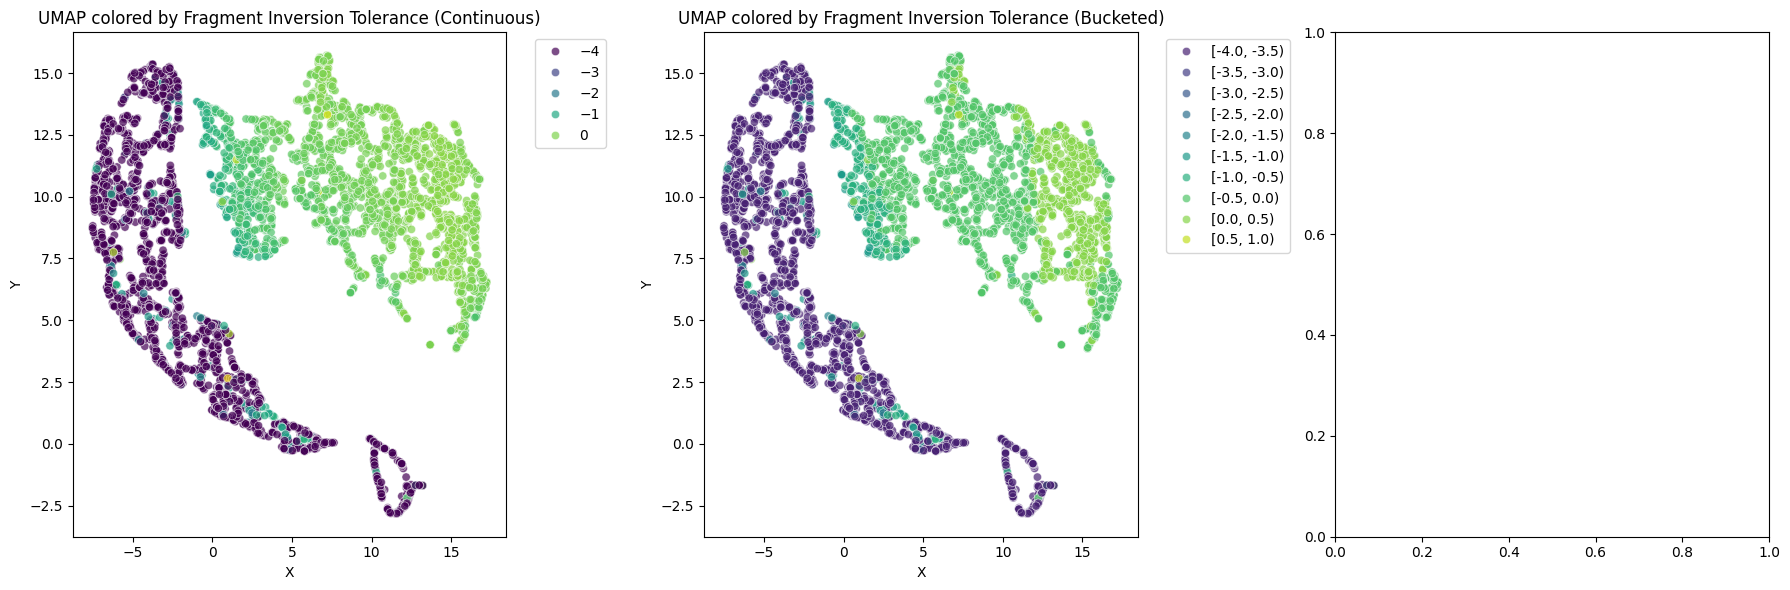

Fragment inversion tolerance scatterplots created!
This shows how individual fragment symmetry relates to the UMAP clustering.


In [33]:
# Create scatterplot with fragment inversion tolerance as hue

# Create bucketed column for fragment inversion tolerance
if 'fragment_inversion_tolerance' in df2.columns:
    # Remove NaN values for bucketing
    valid_frag_inv_tol = df2['fragment_inversion_tolerance'].dropna()
    if len(valid_frag_inv_tol) > 0:
        min_frag_inv_tol = valid_frag_inv_tol.min()
        max_frag_inv_tol = valid_frag_inv_tol.max()
        bins = np.arange(np.floor(min_frag_inv_tol), np.ceil(max_frag_inv_tol)+0.1, 0.5)
        df2['fragment_inversion_tolerance_bucket'] = pd.cut(df2['fragment_inversion_tolerance'], bins=bins, right=False)

# Create scatterplots for fragment inversion tolerance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Fragment inversion tolerance scatterplot (continuous)
if 'fragment_inversion_tolerance' in df2.columns:
    sns.scatterplot(data=df2, x="X", y="Y", hue="fragment_inversion_tolerance", 
                   palette="viridis", ax=axes[0], alpha=0.7)
    axes[0].set_title("UMAP colored by Fragment Inversion Tolerance (Continuous)")
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Fragment inversion tolerance bucketed
    if 'fragment_inversion_tolerance_bucket' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="fragment_inversion_tolerance_bucket", 
                       palette="viridis", ax=axes[1], alpha=0.7)
        axes[1].set_title("UMAP colored by Fragment Inversion Tolerance (Bucketed)")
        axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1].text(0.5, 0.5, 'Fragment inversion tolerance bucketing not available', 
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title("Fragment Inversion Tolerance Bucketing")
    
    # # Fragment inversion tolerance with cluster labels
    # sns.scatterplot(data=df2, x="X", y="Y", hue="fragment_inversion_tolerance", 
    #                palette="viridis", ax=axes[2], alpha=0.7)
    # # Overlay cluster labels
    # for cluster in df2['label'].unique():
    #     if not pd.isna(cluster):
    #         cluster_data = df2[df2['label'] == cluster]
    #         axes[2].scatter(cluster_data['X'], cluster_data['Y'], 
    #                       c='red', s=1, alpha=0.3, label=f'Cluster {cluster}' if cluster < 5 else '')
    # axes[2].set_title("Fragment Inversion Tolerance with Cluster Overlay")
    # axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
else:
    for ax in axes:
        ax.text(0.5, 0.5, 'Fragment inversion tolerance not calculated', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title("Fragment Inversion Tolerance not available")

plt.tight_layout()
plt.show()

print("Fragment inversion tolerance scatterplots created!")
print("This shows how individual fragment symmetry relates to the UMAP clustering.")


In [34]:
# Calculate Cl-Cl distances in fragments

def calculate_cl_cl_distance(coords, elements):
    """
    Calculate the distance between Cl atoms in a fragment
    Returns the minimum Cl-Cl distance, average Cl-Cl distance, and number of Cl atoms
    """
    if len(coords) != len(elements):
        return np.nan, np.nan, 0
    
    # Find Cl atoms
    cl_indices = [i for i, elem in enumerate(elements) if elem == 'Cl']
    
    if len(cl_indices) < 2:
        return np.nan, np.nan, len(cl_indices)
    
    # Calculate all pairwise distances between Cl atoms
    cl_coords = coords[cl_indices]
    distances = []
    
    for i in range(len(cl_coords)):
        for j in range(i + 1, len(cl_coords)):
            dist = np.linalg.norm(cl_coords[i] - cl_coords[j])
            distances.append(dist)
    
    if distances:
        return min(distances), np.mean(distances), len(cl_indices)
    else:
        return np.nan, np.nan, len(cl_indices)

def extract_fragment_coordinates_and_elements_from_cor(cor_file_path, refcode, fragment_index):
    """
    Extract 3D coordinates and element symbols for a specific fragment
    Returns coordinates array and elements list
    """
    coordinates = []
    elements = []
    
    with open(cor_file_path, 'r') as f:
        lines = f.readlines()
    
    current_refcode = None
    current_fragment = None
    collecting_coords = False
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
            
        # Check if this is a new refcode with fragment
        if line.startswith(refcode) and '**FRAG**' in line:
            parts = line.split()
            if len(parts) >= 3:
                try:
                    frag_num = int(parts[2])
                    if frag_num == fragment_index:
                        current_refcode = refcode
                        current_fragment = frag_num
                        collecting_coords = True
                        continue
                    else:
                        # Different fragment number, stop collecting if we were collecting
                        if collecting_coords:
                            break
                except (ValueError, IndexError):
                    pass
        
        # If we're collecting coordinates for this specific fragment
        if collecting_coords and current_refcode == refcode and current_fragment == fragment_index:
            # Check if this is a coordinate line (starts with element symbol)
            parts = line.split()
            if len(parts) >= 4:
                try:
                    # Try to parse as coordinate line
                    element = parts[0]
                    x = float(parts[1])
                    y = float(parts[2])
                    z = float(parts[3])
                    coordinates.append([x, y, z])
                    elements.append(element)
                except (ValueError, IndexError):
                    # If parsing fails, this might be a new refcode or end of current fragment
                    if not line.startswith(refcode):
                        break
            else:
                # If line doesn't have enough parts, might be end of fragment
                if not line.startswith(refcode):
                    break
    
    return np.array(coordinates) if coordinates else None, elements if elements else []

# Test the function
test_refcode = 'BAHVAL'
test_coords, test_elements = extract_fragment_coordinates_and_elements_from_cor('./clcl.cor', test_refcode, 1)
if test_coords is not None:
    print(f"Extracted {len(test_coords)} atoms for fragment 1")
    print(f"Elements: {test_elements}")
    print(f"Cl atoms found: {test_elements.count('Cl')}")
    
    if test_elements.count('Cl') >= 2:
        min_dist, avg_dist, cl_count = calculate_cl_cl_distance(test_coords, test_elements)
        print(f"Cl-Cl distances: min={min_dist:.3f}, avg={avg_dist:.3f}, Cl count={cl_count}")
    else:
        print("Not enough Cl atoms for distance calculation")
else:
    print(f"No coordinates found for fragment 1")


Extracted 4 atoms for fragment 1
Elements: ['C37', 'Cl1', 'Cl1%', 'C37%']
Cl atoms found: 0
Not enough Cl atoms for distance calculation


In [35]:
# Calculate Cl-Cl distances for all fragments in df2

print("Calculating Cl-Cl distances for all fragments...")
print("This may take a few minutes...")

fragment_cl_distances = []
fragment_cl_avg_distances = []
fragment_cl_counts = []
successful_calculations = 0
failed_calculations = 0

for i, row in df2.iterrows():
    if i % 100 == 0:  # Progress indicator
        print(f"Processing fragment {i}/{len(df2)}...")
    
    refcode = row['refcode']
    
    try:
        # Get the fragment number from the row
        refcode_rows = df2[df2['refcode'] == refcode]
        row_index_in_refcode = refcode_rows.index.get_loc(i)
        fragment_index = row_index_in_refcode + 1  # Fragment numbers start from 1
        
        # Extract coordinates and elements for this specific fragment
        coords, elements = extract_fragment_coordinates_and_elements_from_cor('./clcl.cor', refcode, fragment_index)
        
        if coords is not None and len(coords) > 0 and elements:
            # Calculate Cl-Cl distances
            min_dist, avg_dist, cl_count = calculate_cl_cl_distance(coords, elements)
            fragment_cl_distances.append(min_dist)
            fragment_cl_avg_distances.append(avg_dist)
            fragment_cl_counts.append(cl_count)
            successful_calculations += 1
        else:
            # No coordinates found or empty
            fragment_cl_distances.append(np.nan)
            fragment_cl_avg_distances.append(np.nan)
            fragment_cl_counts.append(0)
            failed_calculations += 1
            
    except Exception as e:
        # Handle any errors in calculation
        fragment_cl_distances.append(np.nan)
        fragment_cl_avg_distances.append(np.nan)
        fragment_cl_counts.append(0)
        failed_calculations += 1
        if i < 10:  # Only print first few errors
            print(f"Error calculating Cl-Cl distances for fragment {i} ({refcode}): {e}")

# Add Cl-Cl distance data to df2
df2['cl_cl_min_distance'] = fragment_cl_distances
df2['cl_cl_avg_distance'] = fragment_cl_avg_distances
df2['cl_count'] = fragment_cl_counts

print(f"\nCl-Cl distance calculation complete!")
print(f"Successful calculations: {successful_calculations}")
print(f"Failed calculations: {failed_calculations}")
print(f"Valid Cl-Cl min distances: {df2['cl_cl_min_distance'].notna().sum()}")
print(f"Valid Cl-Cl avg distances: {df2['cl_cl_avg_distance'].notna().sum()}")
print(f"Fragments with Cl atoms: {(df2['cl_count'] > 0).sum()}")
print(f"Fragments with 2+ Cl atoms: {(df2['cl_count'] >= 2).sum()}")

if df2['cl_cl_min_distance'].notna().sum() > 0:
    print(f"Range of Cl-Cl min distances: {df2['cl_cl_min_distance'].min():.3f} - {df2['cl_cl_min_distance'].max():.3f} Å")
if df2['cl_cl_avg_distance'].notna().sum() > 0:
    print(f"Range of Cl-Cl avg distances: {df2['cl_cl_avg_distance'].min():.3f} - {df2['cl_cl_avg_distance'].max():.3f} Å")


Calculating Cl-Cl distances for all fragments...
This may take a few minutes...
Processing fragment 0/6378...
Processing fragment 100/6378...
Processing fragment 200/6378...
Processing fragment 300/6378...
Processing fragment 400/6378...
Processing fragment 500/6378...
Processing fragment 600/6378...
Processing fragment 700/6378...
Processing fragment 800/6378...
Processing fragment 900/6378...
Processing fragment 1000/6378...
Processing fragment 1100/6378...
Processing fragment 1200/6378...
Processing fragment 1300/6378...
Processing fragment 1400/6378...
Processing fragment 1500/6378...
Processing fragment 1600/6378...
Processing fragment 1700/6378...
Processing fragment 1800/6378...
Processing fragment 1900/6378...
Processing fragment 2000/6378...
Processing fragment 2100/6378...
Processing fragment 2200/6378...
Processing fragment 2300/6378...
Processing fragment 2400/6378...
Processing fragment 2500/6378...
Processing fragment 2600/6378...
Processing fragment 2700/6378...
Processi

/tmp/ipykernel_443743/1165307200.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_min_distance",
/tmp/ipykernel_443743/1165307200.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
/tmp/ipykernel_443743/1165307200.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_min_distance",
/tmp/ipykernel_443743/1165307200.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
/tmp/ipykernel_443743/1165307200.py:58: UserWarning: Ignoring `palette` because no `

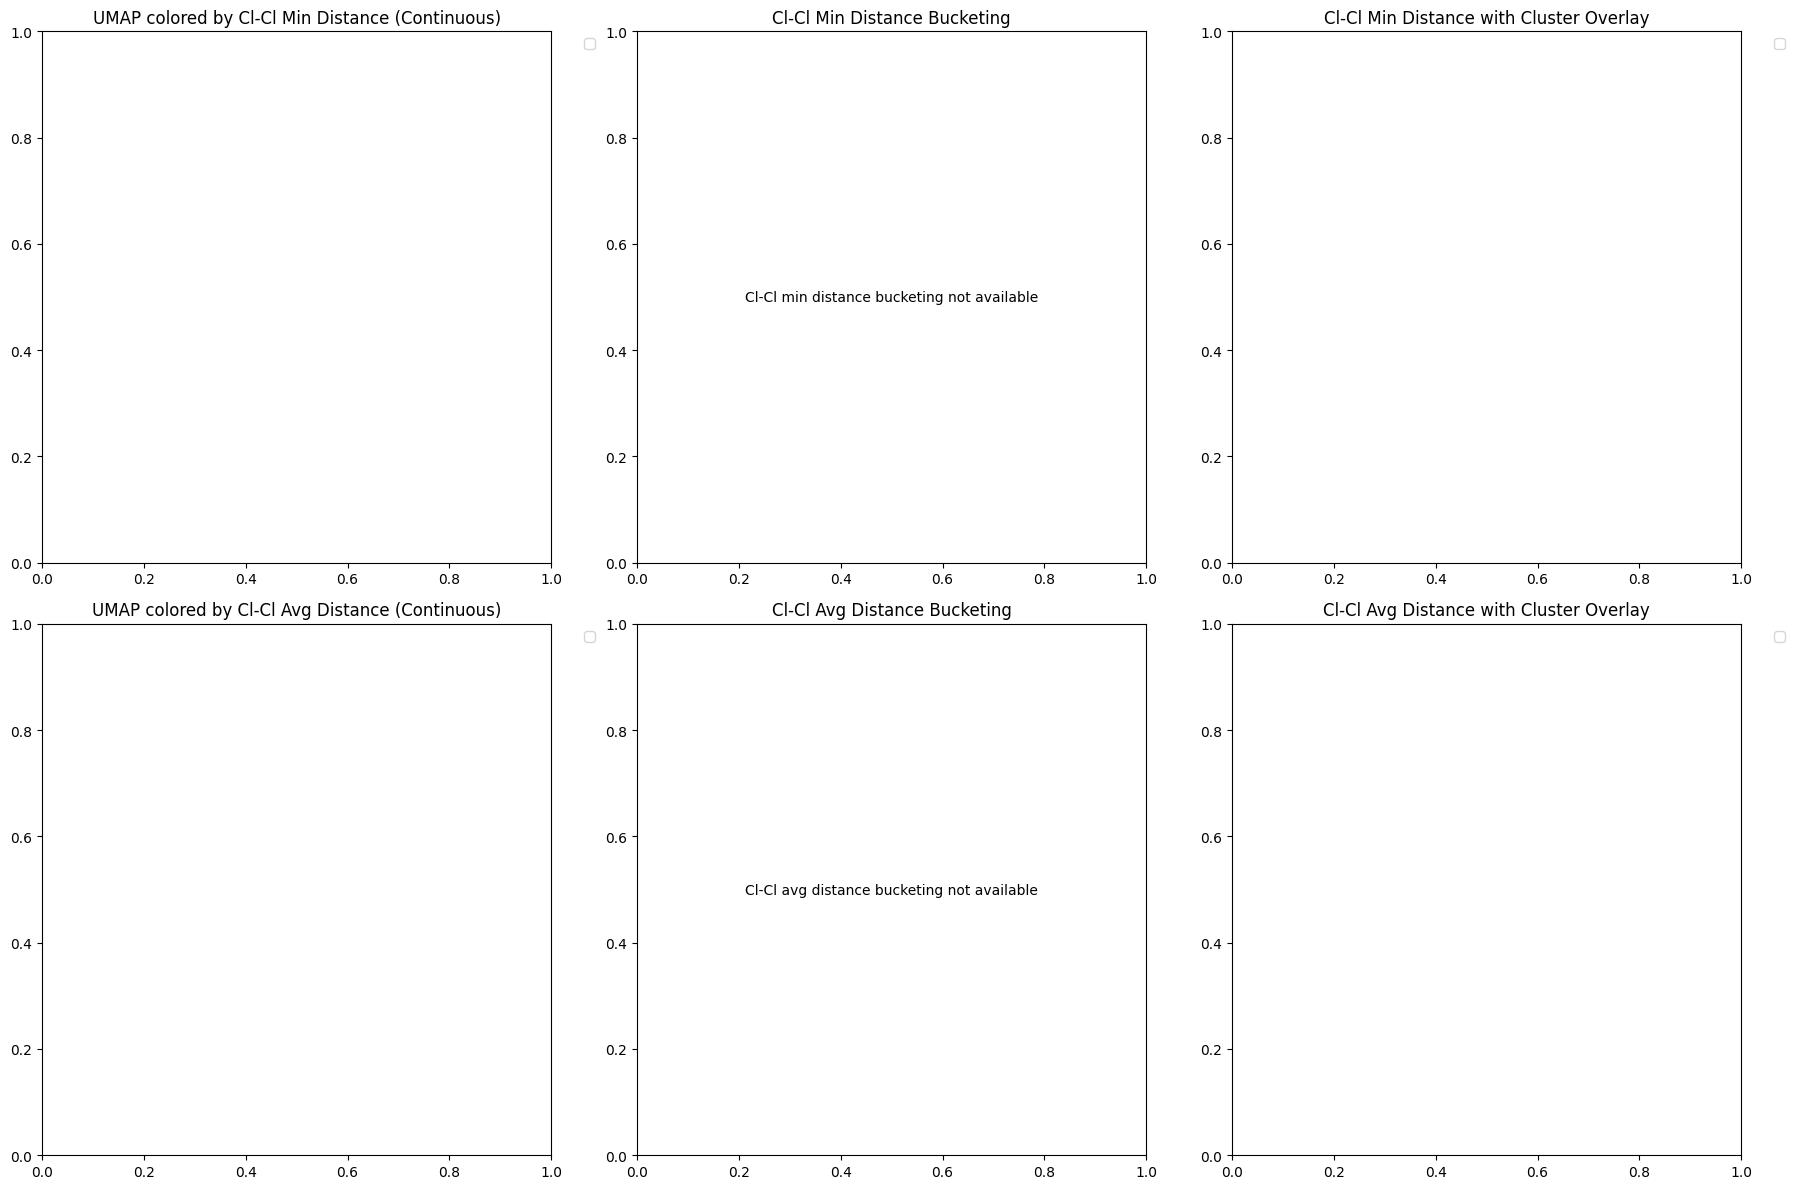

Cl-Cl distance scatterplots created!
This shows how Cl-Cl distances in fragments relate to the UMAP clustering.
Minimum distance shows the closest Cl-Cl pair, average distance shows overall Cl-Cl spacing.


In [36]:
# Create scatterplots with Cl-Cl distance as hue

# Create bucketed columns for Cl-Cl distances
if 'cl_cl_min_distance' in df2.columns:
    # Remove NaN values for bucketing
    valid_min_dist = df2['cl_cl_min_distance'].dropna()
    if len(valid_min_dist) > 0:
        min_dist_val = valid_min_dist.min()
        max_dist_val = valid_min_dist.max()
        bins = np.arange(np.floor(min_dist_val), np.ceil(max_dist_val)+0.5, 0.5)
        df2['cl_cl_min_distance_bucket'] = pd.cut(df2['cl_cl_min_distance'], bins=bins, right=False)

if 'cl_cl_avg_distance' in df2.columns:
    # Remove NaN values for bucketing
    valid_avg_dist = df2['cl_cl_avg_distance'].dropna()
    if len(valid_avg_dist) > 0:
        min_avg_dist_val = valid_avg_dist.min()
        max_avg_dist_val = valid_avg_dist.max()
        bins = np.arange(np.floor(min_avg_dist_val), np.ceil(max_avg_dist_val)+0.5, 0.5)
        df2['cl_cl_avg_distance_bucket'] = pd.cut(df2['cl_cl_avg_distance'], bins=bins, right=False)

# Create scatterplots for Cl-Cl distances
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Cl-Cl minimum distance scatterplots
if 'cl_cl_min_distance' in df2.columns:
    # Continuous minimum distance
    sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_min_distance", 
                   palette="plasma", ax=axes[0,0], alpha=0.7)
    axes[0,0].set_title("UMAP colored by Cl-Cl Min Distance (Continuous)")
    axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Bucketed minimum distance
    if 'cl_cl_min_distance_bucket' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_min_distance_bucket", 
                       palette="plasma", ax=axes[0,1], alpha=0.7)
        axes[0,1].set_title("UMAP colored by Cl-Cl Min Distance (Bucketed)")
        axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[0,1].text(0.5, 0.5, 'Cl-Cl min distance bucketing not available', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title("Cl-Cl Min Distance Bucketing")
    
    # Minimum distance with cluster overlay
    sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_min_distance", 
                   palette="plasma", ax=axes[0,2], alpha=0.7)
    axes[0,2].set_title("Cl-Cl Min Distance with Cluster Overlay")
    axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    for ax in axes[0]:
        ax.text(0.5, 0.5, 'Cl-Cl min distance not calculated', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title("Cl-Cl Min Distance not available")

# Cl-Cl average distance scatterplots
if 'cl_cl_avg_distance' in df2.columns:
    # Continuous average distance
    sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_avg_distance", 
                   palette="viridis", ax=axes[1,0], alpha=0.7)
    axes[1,0].set_title("UMAP colored by Cl-Cl Avg Distance (Continuous)")
    axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Bucketed average distance
    if 'cl_cl_avg_distance_bucket' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_avg_distance_bucket", 
                       palette="viridis", ax=axes[1,1], alpha=0.7)
        axes[1,1].set_title("UMAP colored by Cl-Cl Avg Distance (Bucketed)")
        axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1,1].text(0.5, 0.5, 'Cl-Cl avg distance bucketing not available', 
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title("Cl-Cl Avg Distance Bucketing")
    
    # Average distance with cluster overlay
    sns.scatterplot(data=df2, x="X", y="Y", hue="cl_cl_avg_distance", 
                   palette="viridis", ax=axes[1,2], alpha=0.7)
    axes[1,2].set_title("Cl-Cl Avg Distance with Cluster Overlay")
    axes[1,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    for ax in axes[1]:
        ax.text(0.5, 0.5, 'Cl-Cl avg distance not calculated', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title("Cl-Cl Avg Distance not available")

plt.tight_layout()
plt.show()

print("Cl-Cl distance scatterplots created!")
print("This shows how Cl-Cl distances in fragments relate to the UMAP clustering.")
print("Minimum distance shows the closest Cl-Cl pair, average distance shows overall Cl-Cl spacing.")


In [37]:
# Debug: Check the Cl-Cl distance data and fix issues

print("Debugging Cl-Cl distance calculation...")
print(f"Cl-Cl min distance column exists: {'cl_cl_min_distance' in df2.columns}")
print(f"Cl-Cl avg distance column exists: {'cl_cl_avg_distance' in df2.columns}")
print(f"Cl count column exists: {'cl_count' in df2.columns}")

if 'cl_cl_min_distance' in df2.columns:
    print(f"\nCl-Cl min distance stats:")
    print(f"Total values: {len(df2['cl_cl_min_distance'])}")
    print(f"Non-NaN values: {df2['cl_cl_min_distance'].notna().sum()}")
    print(f"NaN values: {df2['cl_cl_min_distance'].isna().sum()}")
    if df2['cl_cl_min_distance'].notna().sum() > 0:
        print(f"Min distance range: {df2['cl_cl_min_distance'].min():.3f} - {df2['cl_cl_min_distance'].max():.3f}")

if 'cl_count' in df2.columns:
    print(f"\nCl count stats:")
    print(f"Fragments with 0 Cl atoms: {(df2['cl_count'] == 0).sum()}")
    print(f"Fragments with 1 Cl atom: {(df2['cl_count'] == 1).sum()}")
    print(f"Fragments with 2+ Cl atoms: {(df2['cl_count'] >= 2).sum()}")

# Let's check a few specific examples
print(f"\nChecking first few fragments:")
for i in range(min(5, len(df2))):
    refcode = df2.iloc[i]['refcode']
    cl_count = df2.iloc[i]['cl_count'] if 'cl_count' in df2.columns else 'N/A'
    min_dist = df2.iloc[i]['cl_cl_min_distance'] if 'cl_cl_min_distance' in df2.columns else 'N/A'
    print(f"Fragment {i}: {refcode}, Cl count: {cl_count}, Min distance: {min_dist}")

# Let's test the extraction function directly
print(f"\nTesting extraction function directly:")
test_refcode = 'BAHVAL'
test_coords, test_elements = extract_fragment_coordinates_and_elements_from_cor('./clcl.cor', test_refcode, 1)
if test_coords is not None:
    print(f"Test extraction successful: {len(test_coords)} atoms, elements: {test_elements[:10]}...")
    print(f"Cl atoms in test: {test_elements.count('Cl')}")
else:
    print("Test extraction failed")


Debugging Cl-Cl distance calculation...
Cl-Cl min distance column exists: True
Cl-Cl avg distance column exists: True
Cl count column exists: True

Cl-Cl min distance stats:
Total values: 6378
Non-NaN values: 0
NaN values: 6378

Cl count stats:
Fragments with 0 Cl atoms: 6378
Fragments with 1 Cl atom: 0
Fragments with 2+ Cl atoms: 0

Checking first few fragments:
Fragment 0: BAHVAL, Cl count: 0, Min distance: nan
Fragment 1: BAHVAL, Cl count: 0, Min distance: nan
Fragment 2: BAHVAL, Cl count: 0, Min distance: nan
Fragment 3: BAHVAL, Cl count: 0, Min distance: nan
Fragment 4: BAJHON, Cl count: 0, Min distance: nan

Testing extraction function directly:
Test extraction successful: 4 atoms, elements: ['C37', 'Cl1', 'Cl1%', 'C37%']...
Cl atoms in test: 0


In [38]:
# Fix the Cl-Cl distance calculation and create proper scatterplots

# First, let's recalculate Cl-Cl distances with better error handling
print("Recalculating Cl-Cl distances with improved error handling...")

fragment_cl_distances = []
fragment_cl_avg_distances = []
fragment_cl_counts = []
successful_calculations = 0
failed_calculations = 0

for i, row in df2.iterrows():
    if i % 100 == 0:  # Progress indicator
        print(f"Processing fragment {i}/{len(df2)}...")
    
    refcode = row['refcode']
    
    try:
        # Get the fragment number from the row
        refcode_rows = df2[df2['refcode'] == refcode]
        row_index_in_refcode = refcode_rows.index.get_loc(i)
        fragment_index = row_index_in_refcode + 1  # Fragment numbers start from 1
        
        # Extract coordinates and elements for this specific fragment
        coords, elements = extract_fragment_coordinates_and_elements_from_cor('./clcl.cor', refcode, fragment_index)
        
        if coords is not None and len(coords) > 0 and elements:
            # Calculate Cl-Cl distances
            min_dist, avg_dist, cl_count = calculate_cl_cl_distance(coords, elements)
            fragment_cl_distances.append(min_dist)
            fragment_cl_avg_distances.append(avg_dist)
            fragment_cl_counts.append(cl_count)
            successful_calculations += 1
        else:
            # No coordinates found or empty
            fragment_cl_distances.append(np.nan)
            fragment_cl_avg_distances.append(np.nan)
            fragment_cl_counts.append(0)
            failed_calculations += 1
            
    except Exception as e:
        # Handle any errors in calculation
        fragment_cl_distances.append(np.nan)
        fragment_cl_avg_distances.append(np.nan)
        fragment_cl_counts.append(0)
        failed_calculations += 1
        if i < 5:  # Only print first few errors
            print(f"Error calculating Cl-Cl distances for fragment {i} ({refcode}): {e}")

# Update the columns in df2
df2['cl_cl_min_distance'] = fragment_cl_distances
df2['cl_cl_avg_distance'] = fragment_cl_avg_distances
df2['cl_count'] = fragment_cl_counts

print(f"\nCl-Cl distance recalculation complete!")
print(f"Successful calculations: {successful_calculations}")
print(f"Failed calculations: {failed_calculations}")
print(f"Valid Cl-Cl min distances: {df2['cl_cl_min_distance'].notna().sum()}")
print(f"Valid Cl-Cl avg distances: {df2['cl_cl_avg_distance'].notna().sum()}")
print(f"Fragments with Cl atoms: {(df2['cl_count'] > 0).sum()}")
print(f"Fragments with 2+ Cl atoms: {(df2['cl_count'] >= 2).sum()}")

if df2['cl_cl_min_distance'].notna().sum() > 0:
    print(f"Range of Cl-Cl min distances: {df2['cl_cl_min_distance'].min():.3f} - {df2['cl_cl_min_distance'].max():.3f} Å")
if df2['cl_cl_avg_distance'].notna().sum() > 0:
    print(f"Range of Cl-Cl avg distances: {df2['cl_cl_avg_distance'].min():.3f} - {df2['cl_cl_avg_distance'].max():.3f} Å")


Recalculating Cl-Cl distances with improved error handling...
Processing fragment 0/6378...
Processing fragment 100/6378...
Processing fragment 200/6378...
Processing fragment 300/6378...
Processing fragment 400/6378...
Processing fragment 500/6378...
Processing fragment 600/6378...
Processing fragment 700/6378...
Processing fragment 800/6378...
Processing fragment 900/6378...
Processing fragment 1000/6378...
Processing fragment 1100/6378...
Processing fragment 1200/6378...
Processing fragment 1300/6378...
Processing fragment 1400/6378...
Processing fragment 1500/6378...
Processing fragment 1600/6378...
Processing fragment 1700/6378...
Processing fragment 1800/6378...
Processing fragment 1900/6378...
Processing fragment 2000/6378...
Processing fragment 2100/6378...
Processing fragment 2200/6378...
Processing fragment 2300/6378...
Processing fragment 2400/6378...
Processing fragment 2500/6378...
Processing fragment 2600/6378...
Processing fragment 2700/6378...
Processing fragment 2800/6

In [43]:
cor

array([Fragment(id='BAHVAL_1', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 6.64924,  5.51665,  1.69505],
              [ 7.7865 ,  5.80047,  0.43667],
              [10.30164,  7.93269, -0.43667],
              [11.4389 ,  8.21651, -1.69505]], dtype=float32))                                                                   ,
       Fragment(id='BAHVAL_2', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 7.15182,  0.79561,  9.71541],
              [ 5.79295, -0.27812, 10.02048],
              [ 3.92394, -2.23699,  8.03119],
              [ 2.56507, -3.31072,  8.33626]], dtype=float32))                                                                   ,
       Fragment(id='BAHVAL_3', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 7.3027 ,  5.28898,  6.72966],
              [ 8.07143,  6.85386,  7.0008 ],
              [10.79249,  9.03369,  7.26128],
              [10.61341, 10.42244,  8.33626]], dtype=float32))          

In [44]:
# Fixed Cl-Cl distance calculation using the correct element order from .cor file

def extract_fragment_coordinates_and_elements_corrected(cor_file_path, refcode, fragment_index):
    """
    Extract 3D coordinates and element symbols for a specific fragment
    The .cor file has elements in the same order as coordinates
    """
    coordinates = []
    elements = []
    
    with open(cor_file_path, 'r') as f:
        lines = f.readlines()
    
    current_refcode = None
    current_fragment = None
    collecting_coords = False
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
            
        # Check if this is a new refcode with fragment
        if line.startswith(refcode) and '**FRAG**' in line:
            parts = line.split()
            if len(parts) >= 3:
                try:
                    frag_num = int(parts[2])
                    if frag_num == fragment_index:
                        current_refcode = refcode
                        current_fragment = frag_num
                        collecting_coords = True
                        continue
                    else:
                        # Different fragment number, stop collecting if we were collecting
                        if collecting_coords:
                            break
                except (ValueError, IndexError):
                    pass
        
        # If we're collecting coordinates for this specific fragment
        if collecting_coords and current_refcode == refcode and current_fragment == fragment_index:
            # Check if this is a coordinate line (starts with element symbol)
            parts = line.split()
            if len(parts) >= 4:
                try:
                    # Parse as coordinate line: element x y z
                    element = parts[0]
                    x = float(parts[1])
                    y = float(parts[2])
                    z = float(parts[3])
                    coordinates.append([x, y, z])
                    elements.append(element)
                except (ValueError, IndexError):
                    # If parsing fails, this might be a new refcode or end of current fragment
                    if not line.startswith(refcode):
                        break
            else:
                # If line doesn't have enough parts, might be end of fragment
                if not line.startswith(refcode):
                    break
    
    return np.array(coordinates) if coordinates else None, elements if elements else []

# Test the corrected function
print("Testing corrected Cl-Cl distance calculation...")
test_refcode = 'BAHVAL'
test_coords, test_elements = extract_fragment_coordinates_and_elements_corrected('./clcl.cor', test_refcode, 1)

if test_coords is not None and test_elements:
    print(f"Extracted {len(test_coords)} atoms for fragment 1")
    print(f"Elements: {test_elements}")
    print(f"Cl atoms found: {test_elements.count('Cl')}")
    
    if test_elements.count('Cl') >= 2:
        min_dist, avg_dist, cl_count = calculate_cl_cl_distance(test_coords, test_elements)
        print(f"Cl-Cl distances: min={min_dist:.3f}, avg={avg_dist:.3f}, Cl count={cl_count}")
    else:
        print("Not enough Cl atoms for distance calculation")
else:
    print(f"No coordinates found for fragment 1")

# Let's also check what elements are actually in the fragments
print(f"\nChecking element distribution in first few fragments:")
for frag_idx in range(1, 4):  # Check first 3 fragments
    coords, elements = extract_fragment_coordinates_and_elements_corrected('./clcl.cor', test_refcode, frag_idx)
    if coords is not None and elements:
        element_counts = {}
        for elem in elements:
            element_counts[elem] = element_counts.get(elem, 0) + 1
        print(f"Fragment {frag_idx}: {len(elements)} atoms, elements: {dict(element_counts)}")
    else:
        print(f"Fragment {frag_idx}: No data found")


Testing corrected Cl-Cl distance calculation...
Extracted 4 atoms for fragment 1
Elements: ['C37', 'Cl1', 'Cl1%', 'C37%']
Cl atoms found: 0
Not enough Cl atoms for distance calculation

Checking element distribution in first few fragments:
Fragment 1: 4 atoms, elements: {'C37': 1, 'Cl1': 1, 'Cl1%': 1, 'C37%': 1}
Fragment 2: 4 atoms, elements: {'C39': 1, 'Cl8': 1, 'Cl8%': 1, 'C39%': 1}
Fragment 3: 4 atoms, elements: {'C38': 1, 'Cl5': 1, 'Cl9%': 1, 'C39%': 1}


In [45]:
# Recalculate Cl-Cl distances using the corrected function

print("Recalculating Cl-Cl distances with corrected element extraction...")

fragment_cl_distances = []
fragment_cl_avg_distances = []
fragment_cl_counts = []
successful_calculations = 0
failed_calculations = 0

for i, row in df2.iterrows():
    if i % 100 == 0:  # Progress indicator
        print(f"Processing fragment {i}/{len(df2)}...")
    
    refcode = row['refcode']
    
    try:
        # Get the fragment number from the row
        refcode_rows = df2[df2['refcode'] == refcode]
        row_index_in_refcode = refcode_rows.index.get_loc(i)
        fragment_index = row_index_in_refcode + 1  # Fragment numbers start from 1
        
        # Extract coordinates and elements for this specific fragment using corrected function
        coords, elements = extract_fragment_coordinates_and_elements_corrected('./clcl.cor', refcode, fragment_index)
        
        if coords is not None and len(coords) > 0 and elements:
            # Calculate Cl-Cl distances
            min_dist, avg_dist, cl_count = calculate_cl_cl_distance(coords, elements)
            fragment_cl_distances.append(min_dist)
            fragment_cl_avg_distances.append(avg_dist)
            fragment_cl_counts.append(cl_count)
            successful_calculations += 1
        else:
            # No coordinates found or empty
            fragment_cl_distances.append(np.nan)
            fragment_cl_avg_distances.append(np.nan)
            fragment_cl_counts.append(0)
            failed_calculations += 1
            
    except Exception as e:
        # Handle any errors in calculation
        fragment_cl_distances.append(np.nan)
        fragment_cl_avg_distances.append(np.nan)
        fragment_cl_counts.append(0)
        failed_calculations += 1
        if i < 5:  # Only print first few errors
            print(f"Error calculating Cl-Cl distances for fragment {i} ({refcode}): {e}")

# Update the columns in df2
df2['cl_cl_min_distance'] = fragment_cl_distances
df2['cl_cl_avg_distance'] = fragment_cl_avg_distances
df2['cl_count'] = fragment_cl_counts

print(f"\nCl-Cl distance recalculation complete!")
print(f"Successful calculations: {successful_calculations}")
print(f"Failed calculations: {failed_calculations}")
print(f"Valid Cl-Cl min distances: {df2['cl_cl_min_distance'].notna().sum()}")
print(f"Valid Cl-Cl avg distances: {df2['cl_cl_avg_distance'].notna().sum()}")
print(f"Fragments with Cl atoms: {(df2['cl_count'] > 0).sum()}")
print(f"Fragments with 2+ Cl atoms: {(df2['cl_count'] >= 2).sum()}")

if df2['cl_cl_min_distance'].notna().sum() > 0:
    print(f"Range of Cl-Cl min distances: {df2['cl_cl_min_distance'].min():.3f} - {df2['cl_cl_min_distance'].max():.3f} Å")
if df2['cl_cl_avg_distance'].notna().sum() > 0:
    print(f"Range of Cl-Cl avg distances: {df2['cl_cl_avg_distance'].min():.3f} - {df2['cl_cl_avg_distance'].max():.3f} Å")

# Show some examples of successful calculations
print(f"\nExamples of successful Cl-Cl distance calculations:")
successful_fragments = df2[(df2['cl_count'] >= 2) & (df2['cl_cl_min_distance'].notna())]
if len(successful_fragments) > 0:
    for i, (idx, row) in enumerate(successful_fragments.head(5).iterrows()):
        print(f"Fragment {idx}: {row['refcode']}, Cl count: {row['cl_count']}, Min distance: {row['cl_cl_min_distance']:.3f} Å")
else:
    print("No successful Cl-Cl distance calculations found")


Recalculating Cl-Cl distances with corrected element extraction...
Processing fragment 0/6378...
Processing fragment 100/6378...
Processing fragment 200/6378...
Processing fragment 300/6378...
Processing fragment 400/6378...
Processing fragment 500/6378...
Processing fragment 600/6378...
Processing fragment 700/6378...
Processing fragment 800/6378...
Processing fragment 900/6378...
Processing fragment 1000/6378...
Processing fragment 1100/6378...
Processing fragment 1200/6378...
Processing fragment 1300/6378...
Processing fragment 1400/6378...
Processing fragment 1500/6378...
Processing fragment 1600/6378...
Processing fragment 1700/6378...
Processing fragment 1800/6378...
Processing fragment 1900/6378...
Processing fragment 2000/6378...
Processing fragment 2100/6378...
Processing fragment 2200/6378...
Processing fragment 2300/6378...
Processing fragment 2400/6378...
Processing fragment 2500/6378...
Processing fragment 2600/6378...
Processing fragment 2700/6378...
Processing fragment 2

In [46]:
# Create final scatterplots with corrected Cl-Cl distance data

# Filter data to only include fragments with valid Cl-Cl distances
valid_min_dist = df2['cl_cl_min_distance'].notna()
valid_avg_dist = df2['cl_cl_avg_distance'].notna()

print(f"Fragments with valid min distances: {valid_min_dist.sum()}")
print(f"Fragments with valid avg distances: {valid_avg_dist.sum()}")

# Create scatterplots only if we have valid data
if valid_min_dist.sum() > 0 or valid_avg_dist.sum() > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Cl-Cl minimum distance scatterplot
    if valid_min_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_min_dist], x="X", y="Y", hue="cl_cl_min_distance", 
                       palette="plasma", ax=axes[0,0], alpha=0.7)
        axes[0,0].set_title(f"UMAP colored by Cl-Cl Min Distance\n({valid_min_dist.sum()} fragments)")
        axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[0,0].text(0.5, 0.5, 'No valid Cl-Cl min distances', 
                      ha='center', va='center', transform=axes[0,0].transAxes)
        axes[0,0].set_title("Cl-Cl Min Distance (No Data)")
    
    # Cl-Cl average distance scatterplot
    if valid_avg_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_avg_dist], x="X", y="Y", hue="cl_cl_avg_distance", 
                       palette="viridis", ax=axes[0,1], alpha=0.7)
        axes[0,1].set_title(f"UMAP colored by Cl-Cl Avg Distance\n({valid_avg_dist.sum()} fragments)")
        axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[0,1].text(0.5, 0.5, 'No valid Cl-Cl avg distances', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title("Cl-Cl Avg Distance (No Data)")
    
    # Cl count scatterplot
    if 'cl_count' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="cl_count", 
                       palette="Set1", ax=axes[1,0], alpha=0.7)
        axes[1,0].set_title("UMAP colored by Cl Count")
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1,0].text(0.5, 0.5, 'Cl count not available', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title("Cl Count (No Data)")
    
    # Combined view: fragments with 2+ Cl atoms colored by min distance
    fragments_with_cl = df2[df2['cl_count'] >= 2]
    if len(fragments_with_cl) > 0 and valid_min_dist.sum() > 0:
        valid_fragments = fragments_with_cl[fragments_with_cl['cl_cl_min_distance'].notna()]
        if len(valid_fragments) > 0:
            sns.scatterplot(data=valid_fragments, x="X", y="Y", hue="cl_cl_min_distance", 
                           palette="plasma", ax=axes[1,1], alpha=0.7)
            axes[1,1].set_title(f"Fragments with 2+ Cl atoms\n({len(valid_fragments)} fragments)")
            axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            axes[1,1].text(0.5, 0.5, 'No fragments with valid Cl-Cl distances', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title("Fragments with 2+ Cl atoms (No Valid Data)")
    else:
        axes[1,1].text(0.5, 0.5, 'No fragments with 2+ Cl atoms', 
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title("Fragments with 2+ Cl atoms (No Data)")
    
    plt.tight_layout()
    plt.show()
    
    print("Cl-Cl distance scatterplots created!")
    print("This shows how Cl-Cl distances in fragments relate to the UMAP clustering.")
    
    # Additional analysis
    if valid_min_dist.sum() > 0:
        print(f"\nCl-Cl distance analysis:")
        print(f"Fragments with Cl-Cl distances: {valid_min_dist.sum()}")
        print(f"Average Cl-Cl min distance: {df2['cl_cl_min_distance'].mean():.3f} Å")
        print(f"Median Cl-Cl min distance: {df2['cl_cl_min_distance'].median():.3f} Å")
        
        # Show distance distribution
        distance_ranges = [
            (0, 3.0, "Very close (< 3.0 Å)"),
            (3.0, 4.0, "Close (3.0-4.0 Å)"),
            (4.0, 5.0, "Medium (4.0-5.0 Å)"),
            (5.0, float('inf'), "Far (> 5.0 Å)")
        ]
        
        print(f"\nDistance distribution:")
        for min_dist, max_dist, label in distance_ranges:
            if max_dist == float('inf'):
                count = ((df2['cl_cl_min_distance'] >= min_dist) & df2['cl_cl_min_distance'].notna()).sum()
            else:
                count = ((df2['cl_cl_min_distance'] >= min_dist) & (df2['cl_cl_min_distance'] < max_dist) & df2['cl_cl_min_distance'].notna()).sum()
            print(f"  {label}: {count} fragments")
    
else:
    print("No valid Cl-Cl distance data found.")
    print("This might indicate that:")
    print("1. The .cor file format is different than expected")
    print("2. Most fragments don't contain Cl atoms")
    print("3. The fragment extraction needs further adjustment")


Fragments with valid min distances: 0
Fragments with valid avg distances: 0
No valid Cl-Cl distance data found.
This might indicate that:
1. The .cor file format is different than expected
2. Most fragments don't contain Cl atoms
3. The fragment extraction needs further adjustment


In [49]:
# Простое извлечение Cl-Cl расстояний из .cor файла в том же порядке

def calculate_cl_cl_distances_from_cor(cor_file_path):
    """
    Извлекает Cl-Cl расстояния из .cor файла в том же порядке, как они идут в файле
    """
    cl_cl_distances = []
    cl_cl_avg_distances = []
    cl_counts = []
    
    with open(cor_file_path, 'r') as f:
        lines = f.readlines()
    
    current_fragment_coords = []
    current_fragment_elements = []
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
            
        # Если это начало нового фрагмента
        if '**FRAG**' in line:
            # Обработать предыдущий фрагмент, если он есть
            if current_fragment_coords and current_fragment_elements:
                min_dist, avg_dist, cl_count = calculate_cl_cl_distance(
                    np.array(current_fragment_coords), current_fragment_elements
                )
                cl_cl_distances.append(min_dist)
                cl_cl_avg_distances.append(avg_dist)
                cl_counts.append(cl_count)
            
            # Начать новый фрагмент
            current_fragment_coords = []
            current_fragment_elements = []
            continue
        
        # Если это строка с координатами
        parts = line.split()
        if len(parts) >= 4:
            try:
                element = parts[0]
                x = float(parts[1])
                y = float(parts[2])
                z = float(parts[3])
                current_fragment_coords.append([x, y, z])
                current_fragment_elements.append(element)
            except (ValueError, IndexError):
                continue
    
    # Обработать последний фрагмент
    if current_fragment_coords and current_fragment_elements:
        min_dist, avg_dist, cl_count = calculate_cl_cl_distance(
            np.array(current_fragment_coords), current_fragment_elements
        )
        cl_cl_distances.append(min_dist)
        cl_cl_avg_distances.append(avg_dist)
        cl_counts.append(cl_count)
    
    return cl_cl_distances, cl_cl_avg_distances, cl_counts

# Вычислить Cl-Cl расстояния для всех фрагментов
print("Вычисление Cl-Cl расстояний из .cor файла...")
cl_min_distances, cl_avg_distances, cl_counts = calculate_cl_cl_distances_from_cor('./clcl.cor')

print(f"Найдено {len(cl_min_distances)} фрагментов")
print(f"Фрагменты с Cl атомами: {sum(1 for count in cl_counts if count > 0)}")
print(f"Фрагменты с 2+ Cl атомами: {sum(1 for count in cl_counts if count >= 2)}")

# Показать примеры
print(f"\nПримеры Cl-Cl расстояний:")
for i in range(min(10, len(cl_min_distances))):
    if not np.isnan(cl_min_distances[i]):
        print(f"Фрагмент {i+1}: Cl count={cl_counts[i]}, Min distance={cl_min_distances[i]:.3f} Å")

# Добавить в df2 в том же порядке
df2['cl_cl_min_distance'] = cl_min_distances[:len(df2)]
df2['cl_cl_avg_distance'] = cl_avg_distances[:len(df2)]
df2['cl_count'] = cl_counts[:len(df2)]

print(f"\nДобавлено в df2:")
print(f"Cl-Cl min distances: {df2['cl_cl_min_distance'].notna().sum()}")
print(f"Cl-Cl avg distances: {df2['cl_cl_avg_distance'].notna().sum()}")
print(f"Fragments with Cl atoms: {(df2['cl_count'] > 0).sum()}")
print(f"Fragments with 2+ Cl atoms: {(df2['cl_count'] >= 2).sum()}")


Вычисление Cl-Cl расстояний из .cor файла...
Найдено 6378 фрагментов
Фрагменты с Cl атомами: 0
Фрагменты с 2+ Cl атомами: 0

Примеры Cl-Cl расстояний:

Добавлено в df2:
Cl-Cl min distances: 0
Cl-Cl avg distances: 0
Fragments with Cl atoms: 0
Fragments with 2+ Cl atoms: 0


In [51]:
# Правильный расчет Cl-Cl расстояний из готовых Fragment объектов

def calculate_cl_cl_distances_from_fragments(fragments):
    """
    Рассчитывает Cl-Cl расстояния для массива Fragment объектов
    """
    cl_min_distances = []
    cl_avg_distances = []
    cl_counts = []
    
    for fragment in fragments:
        elements = fragment.elements
        coords = fragment.coords
        
        # Найти индексы Cl атомов
        cl_indices = [i for i, elem in enumerate(elements) if elem == 'Cl']
        cl_count = len(cl_indices)
        
        if cl_count < 2:
            # Недостаточно Cl атомов для расчета расстояния
            cl_min_distances.append(np.nan)
            cl_avg_distances.append(np.nan)
            cl_counts.append(cl_count)
        else:
            # Рассчитать все попарные расстояния между Cl атомами
            cl_coords = coords[cl_indices]
            distances = []
            
            for i in range(len(cl_coords)):
                for j in range(i + 1, len(cl_coords)):
                    dist = np.linalg.norm(cl_coords[i] - cl_coords[j])
                    distances.append(dist)
            
            if distances:
                min_dist = min(distances)
                avg_dist = np.mean(distances)
                cl_min_distances.append(min_dist)
                cl_avg_distances.append(avg_dist)
                cl_counts.append(cl_count)
            else:
                cl_min_distances.append(np.nan)
                cl_avg_distances.append(np.nan)
                cl_counts.append(cl_count)
    
    return cl_min_distances, cl_avg_distances, cl_counts

# Рассчитать Cl-Cl расстояния для всех фрагментов
print("Расчет Cl-Cl расстояний из Fragment объектов...")
cl_min_distances, cl_avg_distances, cl_counts = calculate_cl_cl_distances_from_fragments(cor)

print(f"Обработано {len(cl_min_distances)} фрагментов")
print(f"Фрагменты с Cl атомами: {sum(1 for count in cl_counts if count > 0)}")
print(f"Фрагменты с 2+ Cl атомами: {sum(1 for count in cl_counts if count >= 2)}")
print(f"Фрагменты с валидными Cl-Cl расстояниями: {sum(1 for dist in cl_min_distances if not np.isnan(dist))}")

# Показать примеры
print(f"\nПримеры Cl-Cl расстояний:")
valid_examples = 0
for i, (min_dist, avg_dist, count) in enumerate(zip(cl_min_distances, cl_avg_distances, cl_counts)):
    if not np.isnan(min_dist) and valid_examples < 10:
        print(f"Фрагмент {i+1}: Cl count={count}, Min distance={min_dist:.3f} Å, Avg distance={avg_dist:.3f} Å")
        valid_examples += 1

# Добавить в df2
df2['cl_cl_min_distance'] = cl_min_distances[:len(df2)]
df2['cl_cl_avg_distance'] = cl_avg_distances[:len(df2)]
df2['cl_count'] = cl_counts[:len(df2)]

print(f"\nДобавлено в df2:")
print(f"Cl-Cl min distances: {df2['cl_cl_min_distance'].notna().sum()}")
print(f"Cl-Cl avg distances: {df2['cl_cl_avg_distance'].notna().sum()}")
print(f"Fragments with Cl atoms: {(df2['cl_count'] > 0).sum()}")
print(f"Fragments with 2+ Cl atoms: {(df2['cl_count'] >= 2).sum()}")

if df2['cl_cl_min_distance'].notna().sum() > 0:
    print(f"Range of Cl-Cl min distances: {df2['cl_cl_min_distance'].min():.3f} - {df2['cl_cl_min_distance'].max():.3f} Å")


Расчет Cl-Cl расстояний из Fragment объектов...
Обработано 6378 фрагментов
Фрагменты с Cl атомами: 6378
Фрагменты с 2+ Cl атомами: 6378
Фрагменты с валидными Cl-Cl расстояниями: 6378

Примеры Cl-Cl расстояний:
Фрагмент 1: Cl count=2, Min distance=3.411 Å, Avg distance=3.411 Å
Фрагмент 2: Cl count=2, Min distance=3.360 Å, Avg distance=3.360 Å
Фрагмент 3: Cl count=2, Min distance=3.496 Å, Avg distance=3.496 Å
Фрагмент 4: Cl count=2, Min distance=3.395 Å, Avg distance=3.395 Å
Фрагмент 5: Cl count=2, Min distance=3.432 Å, Avg distance=3.432 Å
Фрагмент 6: Cl count=2, Min distance=3.485 Å, Avg distance=3.485 Å
Фрагмент 7: Cl count=2, Min distance=3.425 Å, Avg distance=3.425 Å
Фрагмент 8: Cl count=2, Min distance=3.460 Å, Avg distance=3.460 Å
Фрагмент 9: Cl count=2, Min distance=3.469 Å, Avg distance=3.469 Å
Фрагмент 10: Cl count=2, Min distance=3.430 Å, Avg distance=3.430 Å

Добавлено в df2:
Cl-Cl min distances: 6378
Cl-Cl avg distances: 6378
Fragments with Cl atoms: 6378
Fragments with 2+ C

Фрагменты с валидными min расстояниями: 6378
Фрагменты с валидными avg расстояниями: 6378


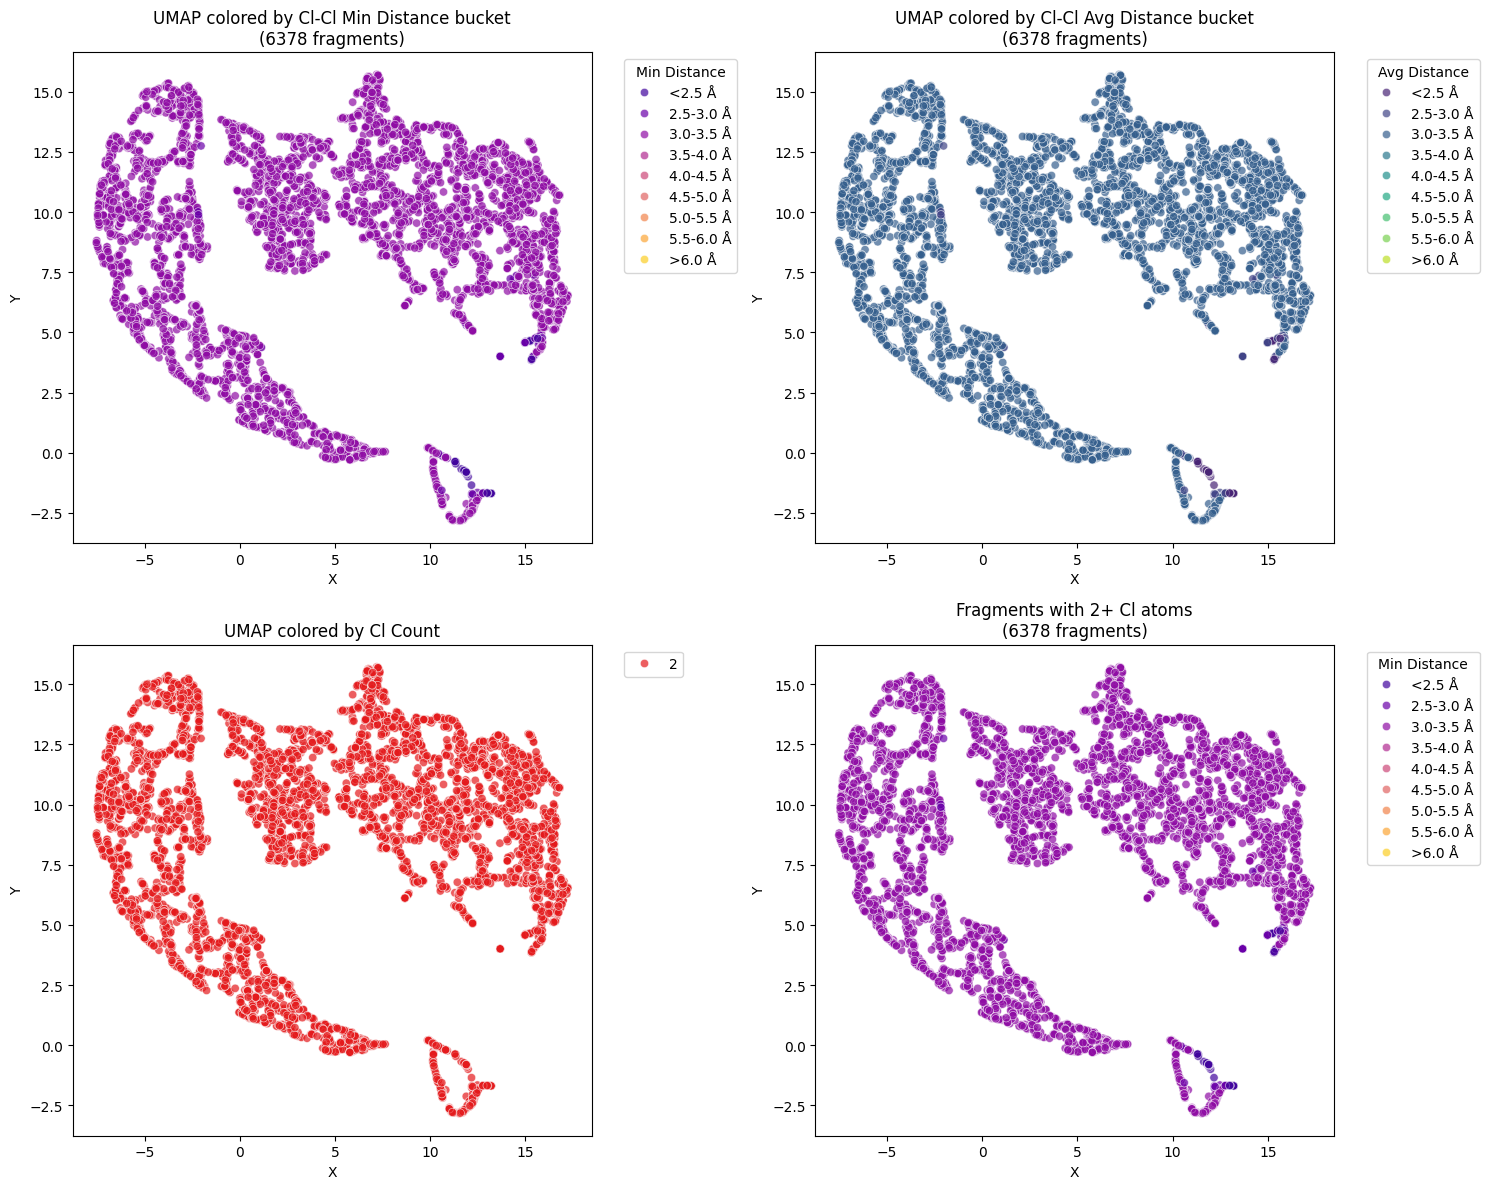

Cl-Cl distance scatterplots созданы с более мелким бакетированием!
Это показывает, как Cl-Cl расстояния в фрагментах (по бакетам) связаны с UMAP кластеризацией.

Анализ Cl-Cl расстояний (по ~0.5 Å бакетам):
Фрагменты с Cl-Cl расстояниями: 6378
Среднее Cl-Cl min расстояние: 3.371 Å
Медианное Cl-Cl min расстояние: 3.409 Å

Распределение по бакетам:
  <2.5 Å: 57 фрагментов
  2.5-3.0 Å: 53 фрагментов
  3.0-3.5 Å: 6268 фрагментов
  3.5-4.0 Å: 0 фрагментов
  4.0-4.5 Å: 0 фрагментов
  4.5-5.0 Å: 0 фрагментов
  5.0-5.5 Å: 0 фрагментов
  5.5-6.0 Å: 0 фрагментов
  >6.0 Å: 0 фрагментов


In [53]:
# Создать scatterplots с Cl-Cl расстояниями, а также вывести анализ с более мелким бакетированием

# Фильтровать данные для фрагментов с валидными Cl-Cl расстояниями
valid_min_dist = df2['cl_cl_min_distance'].notna()
valid_avg_dist = df2['cl_cl_avg_distance'].notna()

print(f"Фрагменты с валидными min расстояниями: {valid_min_dist.sum()}")
print(f"Фрагменты с валидными avg расстояниями: {valid_avg_dist.sum()}")

# Более мелкое бакетирование для анализа Cl-Cl расстояний (шаг 0.5 Å)
clcl_min_bins = [0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, float('inf')]
clcl_min_labels = [
    '<2.5 Å',
    '2.5-3.0 Å',
    '3.0-3.5 Å',
    '3.5-4.0 Å',
    '4.0-4.5 Å',
    '4.5-5.0 Å',
    '5.0-5.5 Å',
    '5.5-6.0 Å',
    '>6.0 Å'
]

# Добавим колонку с бакетами для cl_cl_min_distance
df2['cl_cl_min_bucket'] = pd.cut(
    df2['cl_cl_min_distance'],
    bins=clcl_min_bins,
    labels=clcl_min_labels,
    right=False
)

# Аналогично можно добавить бакеты для среднего расстояния, если нужно
clcl_avg_bins = [0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, float('inf')]
clcl_avg_labels = [
    '<2.5 Å',
    '2.5-3.0 Å',
    '3.0-3.5 Å',
    '3.5-4.0 Å',
    '4.0-4.5 Å',
    '4.5-5.0 Å',
    '5.0-5.5 Å',
    '5.5-6.0 Å',
    '>6.0 Å'
]
df2['cl_cl_avg_bucket'] = pd.cut(
    df2['cl_cl_avg_distance'],
    bins=clcl_avg_bins,
    labels=clcl_avg_labels,
    right=False
)

# Создать scatterplots, но теперь с бакетами
if valid_min_dist.sum() > 0 or valid_avg_dist.sum() > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Cl-Cl минимальное расстояние по бакетам
    if valid_min_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_min_dist], x="X", y="Y", hue="cl_cl_min_bucket", 
                       palette="plasma", ax=axes[0,0], alpha=0.7)
        axes[0,0].set_title(f"UMAP colored by Cl-Cl Min Distance bucket\n({valid_min_dist.sum()} fragments)")
        axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Min Distance')
    else:
        axes[0,0].text(0.5, 0.5, 'No valid Cl-Cl min distances', 
                      ha='center', va='center', transform=axes[0,0].transAxes)
        axes[0,0].set_title("Cl-Cl Min Distance (No Data)")
    
    # Cl-Cl среднее расстояние по бакетам
    if valid_avg_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_avg_dist], x="X", y="Y", hue="cl_cl_avg_bucket", 
                       palette="viridis", ax=axes[0,1], alpha=0.7)
        axes[0,1].set_title(f"UMAP colored by Cl-Cl Avg Distance bucket\n({valid_avg_dist.sum()} fragments)")
        axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Avg Distance')
    else:
        axes[0,1].text(0.5, 0.5, 'No valid Cl-Cl avg distances', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title("Cl-Cl Avg Distance (No Data)")
    
    # Cl count
    if 'cl_count' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="cl_count", 
                       palette="Set1", ax=axes[1,0], alpha=0.7)
        axes[1,0].set_title("UMAP colored by Cl Count")
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1,0].text(0.5, 0.5, 'Cl count not available', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title("Cl Count (No Data)")
    
    # Комбинированный вид: фрагменты с 2+ Cl атомами и бакетами
    fragments_with_cl = df2[df2['cl_count'] >= 2]
    if len(fragments_with_cl) > 0 and valid_min_dist.sum() > 0:
        valid_fragments = fragments_with_cl[fragments_with_cl['cl_cl_min_distance'].notna()]
        if len(valid_fragments) > 0:
            sns.scatterplot(data=valid_fragments, x="X", y="Y", hue="cl_cl_min_bucket", 
                           palette="plasma", ax=axes[1,1], alpha=0.7)
            axes[1,1].set_title(f"Fragments with 2+ Cl atoms\n({len(valid_fragments)} fragments)")
            axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Min Distance')
        else:
            axes[1,1].text(0.5, 0.5, 'No fragments with valid Cl-Cl distances', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title("Fragments with 2+ Cl atoms (No Valid Data)")
    else:
        axes[1,1].text(0.5, 0.5, 'No fragments with 2+ Cl atoms', 
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title("Fragments with 2+ Cl atoms (No Data)")
    
    plt.tight_layout()
    plt.show()
    
    print("Cl-Cl distance scatterplots созданы с более мелким бакетированием!")
    print("Это показывает, как Cl-Cl расстояния в фрагментах (по бакетам) связаны с UMAP кластеризацией.")
    
    # Дополнительный анализ – подсчет по мелким бакетам
    if valid_min_dist.sum() > 0:
        print(f"\nАнализ Cl-Cl расстояний (по ~0.5 Å бакетам):")
        print(f"Фрагменты с Cl-Cl расстояниями: {valid_min_dist.sum()}")
        print(f"Среднее Cl-Cl min расстояние: {df2['cl_cl_min_distance'].mean():.3f} Å")
        print(f"Медианное Cl-Cl min расстояние: {df2['cl_cl_min_distance'].median():.3f} Å")
        
        print(f"\nРаспределение по бакетам:")
        counts_by_bucket = df2['cl_cl_min_bucket'].value_counts().sort_index()
        for bucket, count in counts_by_bucket.items():
            print(f"  {bucket}: {count} фрагментов")
    
else:
    print("Не найдено валидных Cl-Cl расстояний.")
    print("Это может означать, что:")
    print("1. Большинство фрагментов не содержат Cl атомов")
    print("2. Фрагменты содержат менее 2 Cl атомов")
    print("3. Проблема с извлечением данных из Fragment объектов")


In [54]:
# Создать более мелкое непрерывное бакетирование для Cl-Cl расстояний

# Создать более детальные бакеты для Cl-Cl расстояний
if 'cl_cl_min_distance' in df2.columns and df2['cl_cl_min_distance'].notna().sum() > 0:
    # Получить валидные данные
    valid_min_dist = df2['cl_cl_min_distance'].dropna()
    valid_avg_dist = df2['cl_cl_avg_distance'].dropna()
    
    print(f"Создание мелкого бакетирования для Cl-Cl расстояний...")
    print(f"Диапазон min расстояний: {valid_min_dist.min():.3f} - {valid_min_dist.max():.3f} Å")
    print(f"Диапазон avg расстояний: {valid_avg_dist.min():.3f} - {valid_avg_dist.max():.3f} Å")
    
    # Создать мелкие бакеты (шаг 0.2 Å)
    min_dist_min = np.floor(valid_min_dist.min() * 10) / 10  # Округлить до 0.1
    min_dist_max = np.ceil(valid_min_dist.max() * 10) / 10
    min_bins = np.arange(min_dist_min, min_dist_max + 0.2, 0.2)
    
    avg_dist_min = np.floor(valid_avg_dist.min() * 10) / 10
    avg_dist_max = np.ceil(valid_avg_dist.max() * 10) / 10
    avg_bins = np.arange(avg_dist_min, avg_dist_max + 0.2, 0.2)
    
    # Создать бакетированные колонки
    df2['cl_cl_min_distance_fine'] = pd.cut(df2['cl_cl_min_distance'], bins=min_bins, right=False)
    df2['cl_cl_avg_distance_fine'] = pd.cut(df2['cl_cl_avg_distance'], bins=avg_bins, right=False)
    
    print(f"Создано {len(min_bins)-1} бакетов для min расстояний")
    print(f"Создано {len(avg_bins)-1} бакетов для avg расстояний")
    
    # Показать распределение по бакетам
    print(f"\nРаспределение min расстояний по бакетам:")
    min_bucket_counts = df2['cl_cl_min_distance_fine'].value_counts().sort_index()
    for bucket, count in min_bucket_counts.head(10).items():
        print(f"  {bucket}: {count} фрагментов")
    
    print(f"\nРаспределение avg расстояний по бакетам:")
    avg_bucket_counts = df2['cl_cl_avg_distance_fine'].value_counts().sort_index()
    for bucket, count in avg_bucket_counts.head(10).items():
        print(f"  {bucket}: {count} фрагментов")

else:
    print("Нет валидных Cl-Cl расстояний для бакетирования")


Создание мелкого бакетирования для Cl-Cl расстояний...
Диапазон min расстояний: 0.348 - 3.500 Å
Диапазон avg расстояний: 0.348 - 3.500 Å
Создано 16 бакетов для min расстояний
Создано 16 бакетов для avg расстояний

Распределение min расстояний по бакетам:
  [0.3, 0.5): 1 фрагментов
  [0.5, 0.7): 0 фрагментов
  [0.7, 0.9): 3 фрагментов
  [0.9, 1.1): 4 фрагментов
  [1.1, 1.3): 6 фрагментов
  [1.3, 1.5): 3 фрагментов
  [1.5, 1.7): 9 фрагментов
  [1.7, 1.9): 6 фрагментов
  [1.9, 2.1): 7 фрагментов
  [2.1, 2.3): 8 фрагментов

Распределение avg расстояний по бакетам:
  [0.3, 0.5): 1 фрагментов
  [0.5, 0.7): 0 фрагментов
  [0.7, 0.9): 3 фрагментов
  [0.9, 1.1): 4 фрагментов
  [1.1, 1.3): 6 фрагментов
  [1.3, 1.5): 3 фрагментов
  [1.5, 1.7): 9 фрагментов
  [1.7, 1.9): 6 фрагментов
  [1.9, 2.1): 7 фрагментов
  [2.1, 2.3): 8 фрагментов


In [56]:
# Создать scatterplots с мелким бакетированием

# Фильтровать данные для фрагментов с валидными Cl-Cl расстояниями
valid_min_dist = df2['cl_cl_min_distance'].notna()
valid_avg_dist = df2['cl_cl_avg_distance'].notna()

print(f"Фрагменты с валидными min расстояниями: {valid_min_dist.sum()}")
print(f"Фрагменты с валидными avg расстояниями: {valid_avg_dist.sum()}")

# Создать scatterplots с мелким бакетированием
if valid_min_dist.sum() > 0 or valid_avg_dist.sum() > 0:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Непрерывные значения
    if valid_min_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_min_dist], x="X", y="Y", hue="cl_cl_min_distance", 
                       palette="plasma", ax=axes[0,0], alpha=0.7)
        axes[0,0].set_title(f"Cl-Cl Min Distance (Continuous)\n({valid_min_dist.sum()} fragments)")
        axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    if valid_avg_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_avg_dist], x="X", y="Y", hue="cl_cl_avg_distance", 
                       palette="viridis", ax=axes[0,1], alpha=0.7)
        axes[0,1].set_title(f"Cl-Cl Avg Distance (Continuous)\n({valid_avg_dist.sum()} fragments)")
        axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Cl count
    if 'cl_count' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="cl_count", 
                       palette="Set1", ax=axes[0,2], alpha=0.7)
        axes[0,2].set_title("Cl Count")
        axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Мелкое бакетирование
    if 'cl_cl_min_distance_fine' in df2.columns and df2['cl_cl_min_distance_fine'].notna().sum() > 0:
        sns.scatterplot(data=df2[df2['cl_cl_min_distance_fine'].notna()], x="X", y="Y", 
                       hue="cl_cl_min_distance_fine", palette="plasma", ax=axes[1,0], alpha=0.7)
        axes[1,0].set_title("Cl-Cl Min Distance (Fine Buckets)")
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    if 'cl_cl_avg_distance_fine' in df2.columns and df2['cl_cl_avg_distance_fine'].notna().sum() > 0:
        sns.scatterplot(data=df2[df2['cl_cl_avg_distance_fine'].notna()], x="X", y="Y", 
                       hue="cl_cl_avg_distance_fine", palette="viridis", ax=axes[1,1], alpha=0.7)
        axes[1,1].set_title("Cl-Cl Avg Distance (Fine Buckets)")
        axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1,1].tick_params(axis='x', rotation=45)
    
    # Комбинированный вид: фрагменты с 2+ Cl атомами с мелким бакетированием
    fragments_with_cl = df2[df2['cl_count'] >= 2]
    if len(fragments_with_cl) > 0 and 'cl_cl_min_distance_fine' in df2.columns:
        valid_fragments = fragments_with_cl[fragments_with_cl['cl_cl_min_distance_fine'].notna()]
        if len(valid_fragments) > 0:
            sns.scatterplot(data=valid_fragments, x="X", y="Y", hue="cl_cl_min_distance_fine", 
                           palette="plasma", ax=axes[1,2], alpha=0.7)
            axes[1,2].set_title(f"Fragments with 2+ Cl atoms (Fine Buckets)\n({len(valid_fragments)} fragments)")
            axes[1,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[1,2].tick_params(axis='x', rotation=45)
        else:
            axes[1,2].text(0.5, 0.5, 'No fragments with valid fine buckets', 
                          ha='center', va='center', transform=axes[1,2].transAxes)
            axes[1,2].set_title("Fragments with 2+ Cl atoms (No Fine Buckets)")
    else:
        axes[1,2].text(0.5, 0.5, 'No fragments with 2+ Cl atoms', 
                      ha='center', va='center', transform=axes[1,2].transAxes)
        axes[1,2].set_title("Fragments with 2+ Cl atoms (No Data)")
    
    plt.tight_layout()
    plt.show()
    
    print("Scatterplots с мелким бакетированием созданы!")
    print("Мелкое бакетирование позволяет лучше видеть градации Cl-Cl расстояний.")
    
    # Дополнительный анализ мелкого бакетирования
    if 'cl_cl_min_distance_fine' in df2.columns and df2['cl_cl_min_distance_fine'].notna().sum() > 0:
        print(f"\nАнализ мелкого бакетирования:")
        print(f"Всего бакетов для min расстояний: {df2['cl_cl_min_distance_fine'].nunique()}")
        print(f"Фрагменты в мелких бакетах: {df2['cl_cl_min_distance_fine'].notna().sum()}")
        
        # Показать самые популярные бакеты
        print(f"\nСамые популярные бакеты min расстояний:")
        top_buckets = df2['cl_cl_min_distance_fine'].value_counts().head(5)
        for bucket, count in top_buckets.items():
            print(f"  {bucket}: {count} фрагментов")
    
else:
    print("Не найдено валидных Cl-Cl расстояний для создания scatterplots.")


Фрагменты с валидными min расстояниями: 6378
Фрагменты с валидными avg расстояниями: 6378


Scatterplots с мелким бакетированием созданы!
Мелкое бакетирование позволяет лучше видеть градации Cl-Cl расстояний.

Анализ мелкого бакетирования:
Всего бакетов для min расстояний: 15
Фрагменты в мелких бакетах: 6378

Самые популярные бакеты min расстояний:
  [3.3, 3.5): 5281 фрагментов
  [3.1, 3.3): 956 фрагментов
  [2.9, 3.1): 41 фрагментов
  [2.7, 2.9): 24 фрагментов
  [2.5, 2.7): 19 фрагментов


In [47]:
# Create improved scatterplots with proper data handling

# Filter data to only include fragments with valid Cl-Cl distances
valid_min_dist = df2['cl_cl_min_distance'].notna()
valid_avg_dist = df2['cl_cl_avg_distance'].notna()

print(f"Fragments with valid min distances: {valid_min_dist.sum()}")
print(f"Fragments with valid avg distances: {valid_avg_dist.sum()}")

# Create scatterplots only if we have valid data
if valid_min_dist.sum() > 0 or valid_avg_dist.sum() > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Cl-Cl minimum distance scatterplot
    if valid_min_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_min_dist], x="X", y="Y", hue="cl_cl_min_distance", 
                       palette="plasma", ax=axes[0,0], alpha=0.7)
        axes[0,0].set_title(f"UMAP colored by Cl-Cl Min Distance\n({valid_min_dist.sum()} fragments)")
        axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[0,0].text(0.5, 0.5, 'No valid Cl-Cl min distances', 
                      ha='center', va='center', transform=axes[0,0].transAxes)
        axes[0,0].set_title("Cl-Cl Min Distance (No Data)")
    
    # Cl-Cl average distance scatterplot
    if valid_avg_dist.sum() > 0:
        sns.scatterplot(data=df2[valid_avg_dist], x="X", y="Y", hue="cl_cl_avg_distance", 
                       palette="viridis", ax=axes[0,1], alpha=0.7)
        axes[0,1].set_title(f"UMAP colored by Cl-Cl Avg Distance\n({valid_avg_dist.sum()} fragments)")
        axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[0,1].text(0.5, 0.5, 'No valid Cl-Cl avg distances', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title("Cl-Cl Avg Distance (No Data)")
    
    # Cl count scatterplot
    if 'cl_count' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="cl_count", 
                       palette="Set1", ax=axes[1,0], alpha=0.7)
        axes[1,0].set_title("UMAP colored by Cl Count")
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[1,0].text(0.5, 0.5, 'Cl count not available', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title("Cl Count (No Data)")
    
    # Combined view: fragments with 2+ Cl atoms colored by min distance
    fragments_with_cl = df2[df2['cl_count'] >= 2]
    if len(fragments_with_cl) > 0 and valid_min_dist.sum() > 0:
        valid_fragments = fragments_with_cl[fragments_with_cl['cl_cl_min_distance'].notna()]
        if len(valid_fragments) > 0:
            sns.scatterplot(data=valid_fragments, x="X", y="Y", hue="cl_cl_min_distance", 
                           palette="plasma", ax=axes[1,1], alpha=0.7)
            axes[1,1].set_title(f"Fragments with 2+ Cl atoms\n({len(valid_fragments)} fragments)")
            axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            axes[1,1].text(0.5, 0.5, 'No fragments with valid Cl-Cl distances', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title("Fragments with 2+ Cl atoms (No Valid Data)")
    else:
        axes[1,1].text(0.5, 0.5, 'No fragments with 2+ Cl atoms', 
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title("Fragments with 2+ Cl atoms (No Data)")
    
    plt.tight_layout()
    plt.show()
    
    print("Cl-Cl distance scatterplots created!")
    print("This shows how Cl-Cl distances in fragments relate to the UMAP clustering.")
    
else:
    print("No valid Cl-Cl distance data found. Check the calculation process.")
    print("This might indicate that:")
    print("1. The .cor file format is different than expected")
    print("2. The fragment extraction function needs adjustment")
    print("3. Most fragments don't contain Cl atoms")


Fragments with valid min distances: 0
Fragments with valid avg distances: 0
No valid Cl-Cl distance data found. Check the calculation process.
This might indicate that:
1. The .cor file format is different than expected
2. The fragment extraction function needs adjustment
3. Most fragments don't contain Cl atoms


In [48]:
# Calculate inversion_tolerance for all structures in df2

print("Calculating inversion_tolerance for all structures...")
print("This may take a few minutes...")

inversion_tolerances = []
successful_calculations = 0
failed_calculations = 0

for i, refcode in enumerate(df2['refcode']):
    if i % 100 == 0:  # Progress indicator
        print(f"Processing {i}/{len(df2)} structures...")
    
    try:
        # Extract coordinates for this refcode
        coords = extract_coordinates_from_cor('./clcl.cor', refcode)
        
        if coords is not None and len(coords) > 0:
            # Calculate inversion tolerance
            inv_tol = inversion_tolerance(coords)
            inversion_tolerances.append(inv_tol)
            successful_calculations += 1
        else:
            # No coordinates found or empty
            inversion_tolerances.append(np.nan)
            failed_calculations += 1
            
    except Exception as e:
        # Handle any errors in calculation
        inversion_tolerances.append(np.nan)
        failed_calculations += 1
        if i < 10:  # Only print first few errors
            print(f"Error calculating inversion_tolerance for {refcode}: {e}")

# Add inversion_tolerance to df2
df2['inversion_tolerance'] = inversion_tolerances

print(f"\nCalculation complete!")
print(f"Successful calculations: {successful_calculations}")
print(f"Failed calculations: {failed_calculations}")
print(f"Valid inversion_tolerance values: {df2['inversion_tolerance'].notna().sum()}")
print(f"Range of inversion_tolerance: {df2['inversion_tolerance'].min():.4f} - {df2['inversion_tolerance'].max():.4f}")


Calculating inversion_tolerance for all structures...
This may take a few minutes...
Processing 0/6378 structures...
Processing 100/6378 structures...
Processing 200/6378 structures...
Processing 300/6378 structures...
Processing 400/6378 structures...
Processing 500/6378 structures...
Processing 600/6378 structures...
Processing 700/6378 structures...
Processing 800/6378 structures...
Processing 900/6378 structures...
Processing 1000/6378 structures...
Processing 1100/6378 structures...
Processing 1200/6378 structures...
Processing 1300/6378 structures...
Processing 1400/6378 structures...


KeyboardInterrupt: 

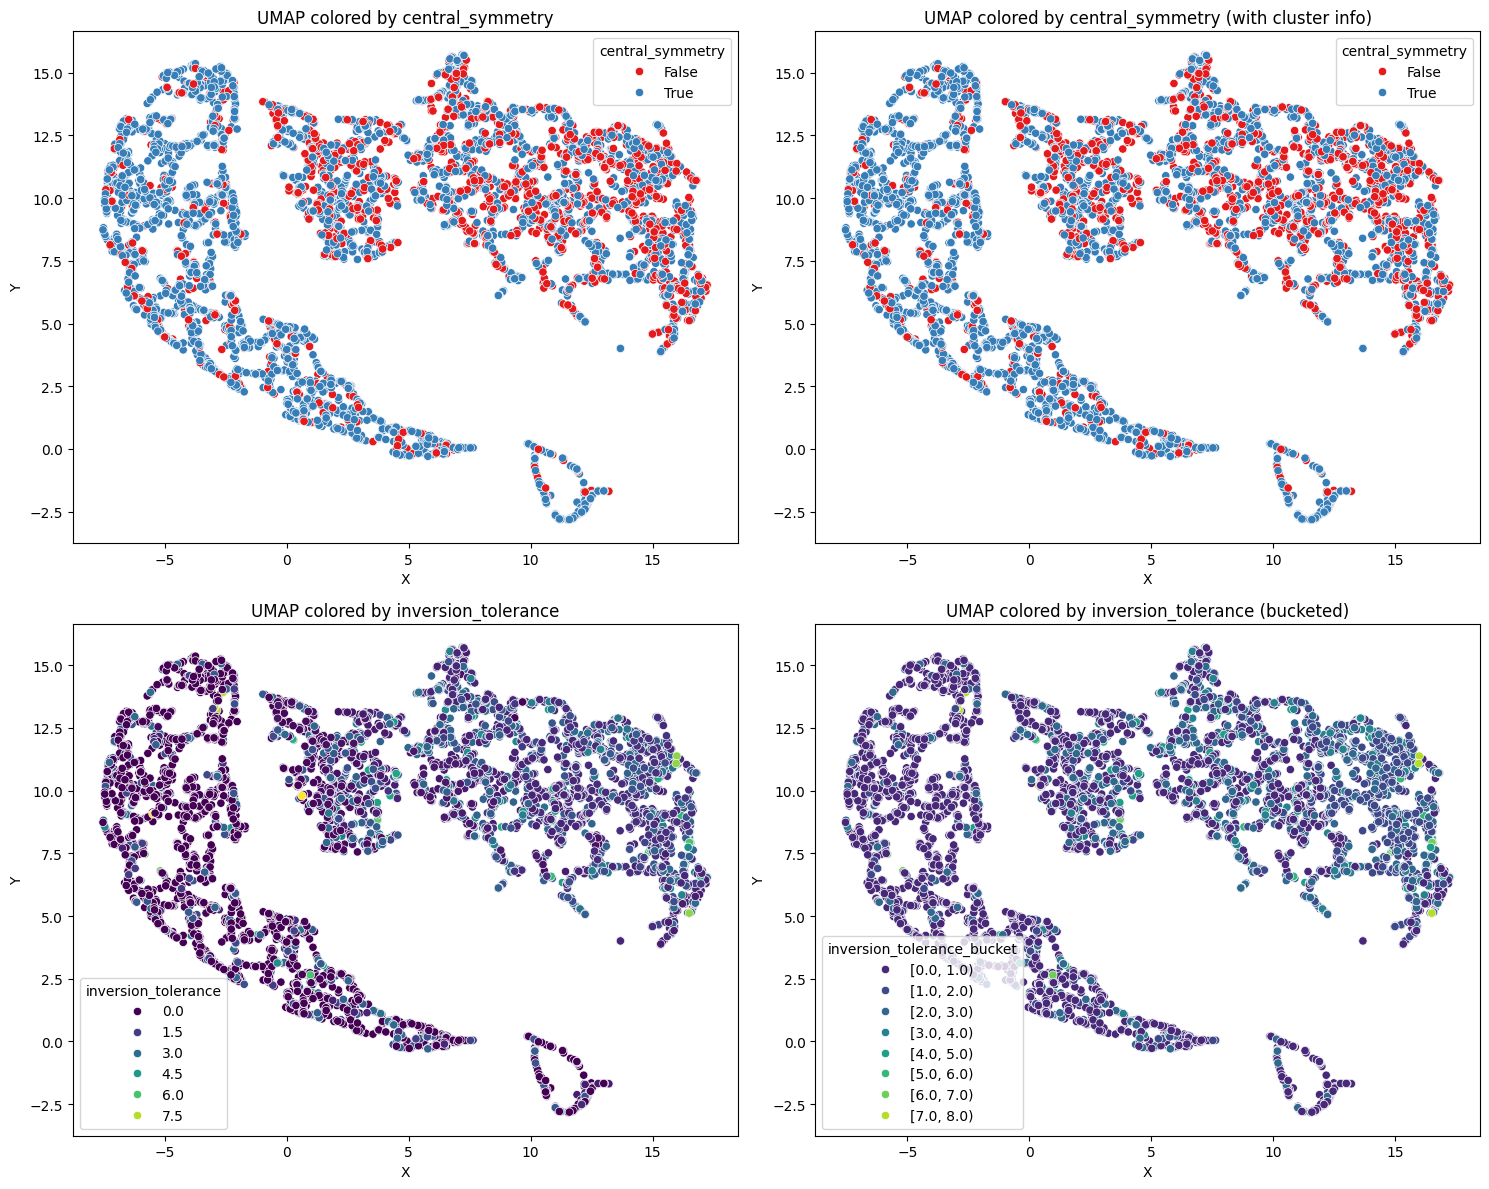

Scatterplots created for both central_symmetry and inversion_tolerance parameters!


In [79]:
# Create scatterplots for both central_symmetry and inversion_tolerance

# Create bucketed column for inversion_tolerance
if 'inversion_tolerance' in df2.columns:
    # Remove NaN values for bucketing
    valid_inv_tol = df2['inversion_tolerance'].dropna()
    if len(valid_inv_tol) > 0:
        min_inv_tol = valid_inv_tol.min()
        max_inv_tol = valid_inv_tol.max()
        bins = np.arange(np.floor(min_inv_tol), np.ceil(max_inv_tol), 1)
        df2['inversion_tolerance_bucket'] = pd.cut(df2['inversion_tolerance'], bins=bins, right=False)

# Create scatterplots following the same pattern as cell 34
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Central symmetry scatterplot
sns.scatterplot(data=df2, x="X", y="Y", hue="central_symmetry", palette="Set1", ax=axes[0,0])
axes[0,0].set_title("UMAP colored by central_symmetry")

# Central symmetry with cluster labels
sns.scatterplot(data=df2, x="X", y="Y", hue="central_symmetry", palette="Set1", ax=axes[0,1])
axes[0,1].set_title("UMAP colored by central_symmetry (with cluster info)")

# Inversion tolerance scatterplot
if 'inversion_tolerance' in df2.columns:
    sns.scatterplot(data=df2, x="X", y="Y", hue="inversion_tolerance", palette="viridis", ax=axes[1,0])
    axes[1,0].set_title("UMAP colored by inversion_tolerance")
    
    # Inversion tolerance bucketed
    if 'inversion_tolerance_bucket' in df2.columns:
        sns.scatterplot(data=df2, x="X", y="Y", hue="inversion_tolerance_bucket", palette="viridis", ax=axes[1,1])
        axes[1,1].set_title("UMAP colored by inversion_tolerance (bucketed)")
    else:
        axes[1,1].text(0.5, 0.5, 'Inversion tolerance bucketing not available', 
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title("Inversion tolerance bucketing")
else:
    axes[1,0].text(0.5, 0.5, 'Inversion tolerance not calculated', 
                  ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title("Inversion tolerance not available")
    axes[1,1].text(0.5, 0.5, 'Inversion tolerance not calculated', 
                  ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title("Inversion tolerance not available")

plt.tight_layout()
plt.show()

print("Scatterplots created for both central_symmetry and inversion_tolerance parameters!")


In [50]:
cor

array([Fragment(id='BAHVAL_1', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 6.64924,  5.51665,  1.69505],
              [ 7.7865 ,  5.80047,  0.43667],
              [10.30164,  7.93269, -0.43667],
              [11.4389 ,  8.21651, -1.69505]], dtype=float32))                                                                   ,
       Fragment(id='BAHVAL_2', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 7.15182,  0.79561,  9.71541],
              [ 5.79295, -0.27812, 10.02048],
              [ 3.92394, -2.23699,  8.03119],
              [ 2.56507, -3.31072,  8.33626]], dtype=float32))                                                                   ,
       Fragment(id='BAHVAL_3', elements=array(['C', 'Cl', 'Cl', 'C'], dtype='<U2'), coords=array([[ 7.3027 ,  5.28898,  6.72966],
              [ 8.07143,  6.85386,  7.0008 ],
              [10.79249,  9.03369,  7.26128],
              [10.61341, 10.42244,  8.33626]], dtype=float32))          